In [ ]:
!pip install stanza pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 813.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 34.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

In [ ]:
!pip install nltk

In [ ]:
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.


In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import stanza
from collections import Counter
import math
import ast
import statistics
import re
import torch
import numpy as np
from statistics import mean, stdev
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from transformers import RobertaTokenizer, RobertaModel
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback

In [ ]:
stanza.download('sk')
nlp = stanza.Pipeline('sk')

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: sk (Slovak) ...


INFO:stanza:Downloaded file to /root/stanza_resources/sk/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: sk (Slovak):
| Processor | Package      |
----------------------------
| tokenize  | snk          |
| mwt       | snk          |
| pos       | snk_nocharlm |
| lemma     | snk_nocharlm |
| depparse  | snk_nocharlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


In [ ]:
df = pd.read_csv('Korpus.csv', sep=";")

# Výpočet indexov

In [ ]:
# Tokenizácia a lematizácia
def process_text(text):
    doc = nlp(text)
    tokens_with_lemmas = []
    for sentence in doc.sentences:
        for token in sentence.tokens:
            for word in token.words:
                tokens_with_lemmas.append((word.text, word.lemma))
    return tokens_with_lemmas

# Aplikácia funkcie
df['processed'] = df['Obsah'].apply(process_text)
print(df.head())

   Index  Rocnik Proza/Basen  \
0      1       2           B   
1      2       2           B   
2      3       2           B   
3      4       2           B   
4      5       2           P   

                                               Obsah  \
0  Škola je veľký dom. Škola je celá veľká. Žijú ...   
1  Slovenčina, kto ti dal toľko nežných krás, že ...   
2  Sadí matka zrniečka do detského srdiečka: „Tu ...   
3  Klope ktosi dneska zrána: Otváraj sa, školská ...   
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...   

                                           processed  
0  [(Škola, škola), (je, byť), (veľký, veľký), (d...  
1  [(Slovenčina, slovenčina), (,, ,), (kto, kto),...  
2  [(Sadí, sadiť), (matka, matka), (zrniečka, zrn...  
3  [(Klope, klopať), (ktosi, ktosi), (dneska, dne...  
4  [(Čo, čo), (vám, vy), (budem, byť), (rozprávať...  


**Word length**

In [ ]:
# Funkcia vyfiltruje len alfabetické tokeny a vráti priemernú dĺžku týchto tokenov
def average_word_length(token_lemma_list):
    word_lengths = [len(token) for token, _ in token_lemma_list if token.isalpha()]
    return sum(word_lengths) / len(word_lengths) if word_lengths else 0

# Aplikácia funkcie
df['avg_word_length'] = df['processed'].apply(average_word_length)
print(df.head())

   Index  Rocnik Proza/Basen  \
0      1       2           B   
1      2       2           B   
2      3       2           B   
3      4       2           B   
4      5       2           P   

                                               Obsah  \
0  Škola je veľký dom. Škola je celá veľká. Žijú ...   
1  Slovenčina, kto ti dal toľko nežných krás, že ...   
2  Sadí matka zrniečka do detského srdiečka: „Tu ...   
3  Klope ktosi dneska zrána: Otváraj sa, školská ...   
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...   

                                           processed  avg_word_length  
0  [(Škola, škola), (je, byť), (veľký, veľký), (d...         4.098361  
1  [(Slovenčina, slovenčina), (,, ,), (kto, kto),...         4.535714  
2  [(Sadí, sadiť), (matka, matka), (zrniečka, zrn...         4.346667  
3  [(Klope, klopať), (ktosi, ktosi), (dneska, dne...         4.936170  
4  [(Čo, čo), (vám, vy), (budem, byť), (rozprávať...         4.652174  


**Word frequenci**

In [ ]:
# Spočíta výskyt každého slova v danom texte
def calculate_freq(token_list):
    tokens = [token.lower() for token, lemma in token_list if token.isalpha()]
    return Counter(tokens)

df['word_freq'] = df['processed'].apply(calculate_freq)
print(df.head())

   Index  Rocnik Proza/Basen  \
0      1       2           B   
1      2       2           B   
2      3       2           B   
3      4       2           B   
4      5       2           P   

                                               Obsah  \
0  Škola je veľký dom. Škola je celá veľká. Žijú ...   
1  Slovenčina, kto ti dal toľko nežných krás, že ...   
2  Sadí matka zrniečka do detského srdiečka: „Tu ...   
3  Klope ktosi dneska zrána: Otváraj sa, školská ...   
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...   

                                           processed  avg_word_length  \
0  [(Škola, škola), (je, byť), (veľký, veľký), (d...         4.098361   
1  [(Slovenčina, slovenčina), (,, ,), (kto, kto),...         4.535714   
2  [(Sadí, sadiť), (matka, matka), (zrniečka, zrn...         4.346667   
3  [(Klope, klopať), (ktosi, ktosi), (dneska, dne...         4.936170   
4  [(Čo, čo), (vám, vy), (budem, byť), (rozprávať...         4.652174   

                               

**Lexical sophistication**

In [ ]:
# Prázdny counter
corpus_counter = Counter()

# Spočíta výskyt slov
for doc_counter in df['word_freq']:
    corpus_counter.update(doc_counter)

# Výber slov ktoré sa vyskytli viac než 150x
high_freq_words = {word for word, freq in corpus_counter.items() if freq > 150}
print("High frequency words:", high_freq_words)

High frequency words: {'mu', 'a', 'od', 'ja', 'ho', 'si', 'tak', 'potom', 'do', 'keď', 's', 'deti', 'no', 'aby', 'bol', 'som', 'len', 'v', 'na', 'k', 'ich', 'jej', 'by', 'o', 'sa', 'za', 'bolo', 'mi', 'aj', 'ju', 'je', 'po', 'ako', 'už', 'ešte', 'ani', 'čo', 'tam', 'nie', 'že', 'z', 'ale', 'tu', 'to'}


In [ ]:
# Vypočíta lexikálnu sofistikovanosť ako pomer tokenov ktoré sa nenachádzajú v zozname vysokofrekvenčných slov k celkovému počtu alfabetických tokenov
def calculate_lexical_sophistication(token_list, high_freq_words):
    tokens = [token.lower() for token, lemma in token_list if token.isalpha()]
    total_tokens = len(tokens)
    if total_tokens == 0:
        return 0
    sophisticated_tokens = [token for token in tokens if token not in high_freq_words]
    sophistication_ratio = len(sophisticated_tokens) / total_tokens
    return sophistication_ratio


df['lexical_sophistication'] = df['processed'].apply(lambda x: calculate_lexical_sophistication(x, high_freq_words))
print(df[['Obsah', 'lexical_sophistication']].head())

                                               Obsah  lexical_sophistication
0  Škola je veľký dom. Škola je celá veľká. Žijú ...                0.704918
1  Slovenčina, kto ti dal toľko nežných krás, že ...                0.750000
2  Sadí matka zrniečka do detského srdiečka: „Tu ...                0.693333
3  Klope ktosi dneska zrána: Otváraj sa, školská ...                0.808511
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...                0.657609


In [ ]:
# Vytvorenie POS tagu
def process_text(text):
    doc = nlp(text)
    tokens_with_info = []
    for sentence in doc.sentences:
        for token in sentence.tokens:
            for word in token.words:
                tokens_with_info.append((word.text, word.lemma, word.upos))
    return tokens_with_info

# Nový stlpec je vo forme Token/lema/POS tag
df['processed_info'] = df['Obsah'].apply(process_text)
print(df[['Obsah', 'processed_info']].head())

                                               Obsah  \
0  Škola je veľký dom. Škola je celá veľká. Žijú ...   
1  Slovenčina, kto ti dal toľko nežných krás, že ...   
2  Sadí matka zrniečka do detského srdiečka: „Tu ...   
3  Klope ktosi dneska zrána: Otváraj sa, školská ...   
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...   

                                      processed_info  
0  [(Škola, škola, NOUN), (je, byť, AUX), (veľký,...  
1  [(Slovenčina, slovenčina, NOUN), (,, ,, PUNCT)...  
2  [(Sadí, sadiť, VERB), (matka, matka, NOUN), (z...  
3  [(Klope, klopať, VERB), (ktosi, ktosi, PRON), ...  
4  [(Čo, čo, PRON), (vám, vy, PRON), (budem, byť,...  


**Lexical density**

In [ ]:
# Funkcia na vyrátanie Lexical Density
def calculate_lexical_density(token_list):
    # Zadefinovanie POS tagov ktoré označuju typické lexikálne slová
    lexical_pos = {'NOUN', 'VERB', 'ADJ', 'ADV'}
    tokens = [token for token, lemma, pos in token_list if token.isalpha()]
    total_tokens = len(tokens)
    if total_tokens == 0:
        return 0
    lexical_count = sum(1 for token, lemma, pos in token_list if token.isalpha() and pos in lexical_pos)
    density = lexical_count / total_tokens
    return density


df['lexical_density'] = df['processed_info'].apply(calculate_lexical_density)
print(df[['Obsah', 'lexical_density']].head())

                                               Obsah  lexical_density
0  Škola je veľký dom. Škola je celá veľká. Žijú ...         0.590164
1  Slovenčina, kto ti dal toľko nežných krás, že ...         0.464286
2  Sadí matka zrniečka do detského srdiečka: „Tu ...         0.653333
3  Klope ktosi dneska zrána: Otváraj sa, školská ...         0.744681
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...         0.527174


**Lexical variation**

**TTR**

In [ ]:
# Funkcia na výpočet Type-Token Ratio len pre alfabetické tokeny
def calculate_ttr(token_list):
    tokens = [token.lower() for token, lemma, pos in token_list if token.isalpha()]
    total_tokens = len(tokens)
    if total_tokens == 0:
        return 0
    unique_tokens = set(tokens)
    ttr = len(unique_tokens) / total_tokens
    return ttr

df['TTR'] = df['processed_info'].apply(calculate_ttr)
print(df[['Obsah', 'TTR']].head())

                                               Obsah       TTR
0  Škola je veľký dom. Škola je celá veľká. Žijú ...  0.737705
1  Slovenčina, kto ti dal toľko nežných krás, že ...  0.892857
2  Sadí matka zrniečka do detského srdiečka: „Tu ...  0.786667
3  Klope ktosi dneska zrána: Otváraj sa, školská ...  0.872340
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...  0.673913


**Root TTR**

In [ ]:
# Funkcia na výpočet root TTR - delí počet jedinečných tokenov odmocninou z celkového počtu tokenov
def calculate_root_ttr(token_list):
    tokens = [token.lower() for token, lemma, pos in token_list if token.isalpha()]
    total_tokens = len(tokens)
    if total_tokens == 0:
        return 0
    unique_tokens = set(tokens)
    root_ttr = len(unique_tokens) / math.sqrt(total_tokens)
    return root_ttr


df['root_ttr'] = df['processed_info'].apply(calculate_root_ttr)
print(df[['Obsah', 'root_ttr']].head())

                                               Obsah  root_ttr
0  Škola je veľký dom. Škola je celá veľká. Žijú ...  5.761660
1  Slovenčina, kto ti dal toľko nežných krás, že ...  4.724556
2  Sadí matka zrniečka do detského srdiečka: „Tu ...  6.812733
3  Klope ktosi dneska zrána: Otváraj sa, školská ...  5.980465
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...  9.141401


**Log TTR**

In [ ]:
# Funkcia na výpočet Log TTR - využíva logaritmy na normalizáciu hodnôt
def calculate_log_ttr(token_list):
    tokens = [token.lower() for token, lemma, pos in token_list if token.isalpha()]
    total_tokens = len(tokens)
    if total_tokens <= 1:
        return 0
    unique_tokens = set(tokens)
    return math.log(len(unique_tokens)) / math.log(total_tokens)

df['log_ttr'] = df['processed_info'].apply(calculate_log_ttr)
print(df[['Obsah', 'log_ttr']].head())

                                               Obsah   log_ttr
0  Škola je veľký dom. Škola je celá veľká. Žijú ...  0.925998
1  Slovenčina, kto ti dal toľko nežných krás, že ...  0.965990
2  Sadí matka zrniečka do detského srdiečka: „Tu ...  0.944424
3  Klope ktosi dneska zrána: Otváraj sa, školská ...  0.964527
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...  0.924322


**Corrected TTR**

In [ ]:
# Corrected TTR funkcia - delí počet jedinečných tokenov odmocninou z dvojnásobku celkového počtu tokenov
def calculate_corrected_ttr(token_list):
    tokens = [token.lower() for token, lemma, pos in token_list if token.isalpha()]
    total_tokens = len(tokens)
    if total_tokens == 0:
        return 0
    unique_tokens = set(tokens)
    corrected_ttr = len(unique_tokens) / math.sqrt(2 * total_tokens)
    return corrected_ttr

df['corrected_ttr'] = df['processed_info'].apply(calculate_corrected_ttr)
print(df[['Obsah', 'corrected_ttr']].head())

                                               Obsah  corrected_ttr
0  Škola je veľký dom. Škola je celá veľká. Žijú ...       4.074109
1  Slovenčina, kto ti dal toľko nežných krás, že ...       3.340766
2  Sadí matka zrniečka do detského srdiečka: „Tu ...       4.817330
3  Klope ktosi dneska zrána: Otváraj sa, školská ...       4.228827
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...       6.463947


**TTR_N** - Iba podstatné mená (nouns)

In [ ]:
# Výpočet TTR - do úvahy berie len podstatné mená
def calculate_ttr_nouns(token_list):
    noun_tokens = [token.lower() for token, lemma, pos in token_list if token.isalpha() and pos == "NOUN"]
    total_nouns = len(noun_tokens)
    if total_nouns == 0:
        return 0
    unique_nouns = set(noun_tokens)
    return len(unique_nouns) / total_nouns

df['TTR_nouns'] = df['processed_info'].apply(calculate_ttr_nouns)
print(df[['Obsah', 'TTR_nouns']].head())

                                               Obsah  TTR_nouns
0  Škola je veľký dom. Škola je celá veľká. Žijú ...   0.782609
1  Slovenčina, kto ti dal toľko nežných krás, že ...   1.000000
2  Sadí matka zrniečka do detského srdiečka: „Tu ...   0.870968
3  Klope ktosi dneska zrána: Otváraj sa, školská ...   0.812500
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...   0.710526


**TTR-V** - iba slovesá (verbs)

In [ ]:
# Výpočet TTR - do úvahy berie len slovesá
def calculate_ttr_verbs(token_list):
    verb_tokens = [token.lower() for token, lemma, pos in token_list if token.isalpha() and pos == "VERB"]
    total_verbs = len(verb_tokens)
    if total_verbs == 0:
        return 0
    unique_verbs = set(verb_tokens)
    return len(unique_verbs) / total_verbs

df['ttr_verbs'] = df['processed_info'].apply(calculate_ttr_verbs)
print(df[['Obsah', 'ttr_verbs']].head())

                                               Obsah  ttr_verbs
0  Škola je veľký dom. Škola je celá veľká. Žijú ...   1.000000
1  Slovenčina, kto ti dal toľko nežných krás, že ...   1.000000
2  Sadí matka zrniečka do detského srdiečka: „Tu ...   0.833333
3  Klope ktosi dneska zrána: Otváraj sa, školská ...   0.800000
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...   0.891892


**TTR-A** - iba prídavné mena (adjectives)

In [ ]:
# Výpočet TTR - do úvahy berie len prídavné mená
def calculate_ttr_adjectives(token_list):
    adj_tokens = [token.lower() for token, lemma, pos in token_list if token.isalpha() and pos == "ADJ"]
    total_adjs = len(adj_tokens)
    if total_adjs == 0:
        return 0
    unique_adjs = set(adj_tokens)
    return len(unique_adjs) / total_adjs

df['ttr_adjectives'] = df['processed_info'].apply(calculate_ttr_adjectives)
print(df[['Obsah', 'ttr_adjectives']].head())

                                               Obsah  ttr_adjectives
0  Škola je veľký dom. Škola je celá veľká. Žijú ...           0.875
1  Slovenčina, kto ti dal toľko nežných krás, že ...           1.000
2  Sadí matka zrniečka do detského srdiečka: „Tu ...           1.000
3  Klope ktosi dneska zrána: Otváraj sa, školská ...           1.000
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...           1.000


**MATTR** windowsize = 100

In [ ]:
# Výpočet Moving-Average Type-Token Ratio (MATTR) s nastavením windowsize = 100
def calculate_MATTR(token_list, window_size=100):

    if isinstance(token_list, str):
        try:
            token_list = ast.literal_eval(token_list)
        except Exception as e:
            print("Conversion error:", e)
            return None

    tokens = []
    for item in token_list:
        if isinstance(item, tuple):
            token = item[0] if len(item) >= 1 else ""
        else:
            token = item

        if isinstance(token, str) and token.isalpha():
            tokens.append(token.lower())

    n = len(tokens)
    if n < window_size:
        return len(set(tokens)) / n if n > 0 else 0

    ttr_values = []
    for i in range(n - window_size + 1):
        window = tokens[i:i + window_size]
        window_ttr = len(set(window)) / window_size
        ttr_values.append(window_ttr)

    return mean(ttr_values)

df['MATTR'] = df['processed_info'].apply(lambda x: calculate_MATTR(x, window_size=100))
print(df[['Obsah', 'MATTR']].head())

                                               Obsah     MATTR
0  Škola je veľký dom. Škola je celá veľká. Žijú ...  0.737705
1  Slovenčina, kto ti dal toľko nežných krás, že ...  0.892857
2  Sadí matka zrniečka do detského srdiečka: „Tu ...  0.786667
3  Klope ktosi dneska zrána: Otváraj sa, školská ...  0.872340
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...  0.792000


**Mistríkov index**

In [ ]:
# Spočíta počet slabík v slove
def count_syllables_slovak(word):
    word = word.lower()
    vowels = "aáäeéiíoóuúyý"
    syllable_groups = re.findall(f'[{vowels}]+', word)
    return max(1, len(syllable_groups))

# Výpočet počtu slov, unikátnych slov a poemru opakovania slov
all_text = " ".join(df["Obsah"].tolist())
doc_all = nlp(all_text)

global_words = []
for sentence in doc_all.sentences:
    for token in sentence.words:
        if token.text.isalpha():
            global_words.append(token.text.lower())

total_words_global = len(global_words)
unique_words_global = len(set(global_words))
global_ratio = total_words_global / unique_words_global if unique_words_global != 0 else 0

print("Počet slov korpusu:", total_words_global)
print("Počet unikátnych slov korpusu:", unique_words_global)
print("Pomer opakovania slov:", global_ratio)

# Výpočet mistríkovho indexu pre každý text
def calculate_mistrik(text, global_ratio):
    doc = nlp(text)
    words = []
    total_syllables = 0
    total_sentences = len(doc.sentences)

    for sentence in doc.sentences:
        for token in sentence.words:
            if token.text.isalpha():
                w = token.text.lower()
                words.append(w)
                total_syllables += count_syllables_slovak(w)

    total_words = len(words)
    if total_words == 0 or total_sentences == 0:
        return None

    ASW = total_syllables / total_words
    ASL = total_words / total_sentences

    mistrik = 50 - ((ASW * ASL) / global_ratio)
    return mistrik

df["mistrik"] = df["Obsah"].apply(lambda x: calculate_mistrik(x, global_ratio))
print(df[['Obsah', 'mistrik']].head())

Počet slov korpusu: 71064
Počet unikátnych slov korpusu: 16924
Pomer opakovania slov: 4.19900732687308
                                               Obsah    mistrik
0  Škola je veľký dom. Škola je celá veľká. Žijú ...  46.844492
1  Slovenčina, kto ti dal toľko nežných krás, že ...  44.403439
2  Sadí matka zrniečka do detského srdiečka: „Tu ...  46.612956
3  Klope ktosi dneska zrána: Otváraj sa, školská ...  46.870009
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...  44.582053


**Nouns abstractness distribution**

In [ ]:
# Definícia 30 abstraktných podstatný mien
abstract_nouns_set = {
    'láska', 'nádej', 'radosť', 'smútok', 'hnev', 'strach', 'viera', 'pravda',
    'česť', 'dôvera', 'priateľstvo', 'úcta', 'úprimnosť', 'trpezlivosť', 'pokoj',
    'sebaúcta', 'šťastie', 'múdrosť', 'spravodlivosť', 'hravosť', 'zvedavosť',
    'vďačnosť', 'empatia', 'kreativita', 'zodpovednosť', 'snaha', 'odvaha',
    'pokora', 'čestnosť', 'láskavosť'
}

# Vypočíta pomer abstraktnosti pre podstatné mená v dokumente.
def calculate_noun_abstractness(token_list, abstract_nouns):
    nouns = [token.lower() for token, lemma, pos in token_list if pos == "NOUN" and token.isalpha()]
    total_nouns = len(nouns)
    if total_nouns == 0:
        return 0
    abstract_count = sum(1 for noun in nouns if noun in abstract_nouns)
    return abstract_count / total_nouns

df['noun_abstractness'] = df['processed_info'].apply(lambda x: calculate_noun_abstractness(x, abstract_nouns_set))
print(df[['processed_info', 'noun_abstractness']].head())

                                      processed_info  noun_abstractness
0  [(Škola, škola, NOUN), (je, byť, AUX), (veľký,...                0.0
1  [(Slovenčina, slovenčina, NOUN), (,, ,, PUNCT)...                0.0
2  [(Sadí, sadiť, VERB), (matka, matka, NOUN), (z...                0.0
3  [(Klope, klopať, VERB), (ktosi, ktosi, PRON), ...                0.0
4  [(Čo, čo, PRON), (vám, vy, PRON), (budem, byť,...                0.0


**Depth of the dependency trees**

In [ ]:
# Vypočíta priemernú hĺbku dependency stromov pre daný text
def depth_of_dependency_tree(text):
    doc = nlp(text)  # Spracovanie textu pomocou Stanza
    sentence_depths = []
    for sentence in doc.sentences:
        children = {}
        for token in sentence.words:
            children.setdefault(token.head, []).append(token.id)

        # Rekurzívna funkcia na výpočet hĺbky od daného token id
        def get_depth(token_id):
            if token_id not in children:
                return 1
            else:
                return 1 + max(get_depth(child) for child in children[token_id])

        if 0 in children:
            sentence_depth = max(get_depth(child) for child in children[0])
        else:
            sentence_depth = 1

        sentence_depths.append(sentence_depth)

    # Vráti preimernú hĺbku
    avg_depth = sum(sentence_depths) / len(sentence_depths) if sentence_depths else 0
    return avg_depth

df['dependency_tree_depth'] = df['Obsah'].apply(depth_of_dependency_tree)
print(df[['Obsah', 'dependency_tree_depth']].head())

                                               Obsah  dependency_tree_depth
0  Škola je veľký dom. Škola je celá veľká. Žijú ...               3.750000
1  Slovenčina, kto ti dal toľko nežných krás, že ...               5.500000
2  Sadí matka zrniečka do detského srdiečka: „Tu ...               4.333333
3  Klope ktosi dneska zrána: Otváraj sa, školská ...               3.714286
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...               4.312500


**Length of non-verbal chains**

In [ ]:
# Vypočíta maximálnu dĺžku neverbálnych reťazcov v danom texte
# Neverbálny reťazec je postupnosť po sebe nasledujúcich tokenov ktoré nie sú slovesá
def calculate_non_verbal_chain_length(text):
    doc = nlp(text)
    max_chain_overall = 0

    for sentence in doc.sentences:
        current_chain = 0
        max_chain_sentence = 0
        for token in sentence.words:
            if token.upos != "VERB":
                current_chain += 1
            else:
                # V prípade výskytu slovesa aktualizujeme maximálnu hodnotu pre vetu a resetujeme counter
                if current_chain > max_chain_sentence:
                    max_chain_sentence = current_chain
                current_chain = 0

        if current_chain > max_chain_sentence:
            max_chain_sentence = current_chain

        if max_chain_sentence > max_chain_overall:
            max_chain_overall = max_chain_sentence

    return max_chain_overall

df['non_verbal_chain_length'] = df['Obsah'].apply(calculate_non_verbal_chain_length)
print(df[['Obsah', 'non_verbal_chain_length']].head())

                                               Obsah  non_verbal_chain_length
0  Škola je veľký dom. Škola je celá veľká. Žijú ...                       15
1  Slovenčina, kto ti dal toľko nežných krás, že ...                       16
2  Sadí matka zrniečka do detského srdiečka: „Tu ...                       19
3  Klope ktosi dneska zrána: Otváraj sa, školská ...                       10
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...                        9


**Verbal roots**

In [ ]:
# Vypočíta počet slovesných koreňov v danom texte.
def calculate_verbal_roots(text):
    doc = nlp(text)
    verbal_roots_count = 0
    for sentence in doc.sentences:
        for token in sentence.words:
            if token.deprel == "root" and token.upos == "VERB":
                verbal_roots_count += 1
    return verbal_roots_count

df['verbal_roots'] = df['Obsah'].apply(calculate_verbal_roots)
print(df[['Obsah', 'verbal_roots']].head())

                                               Obsah  verbal_roots
0  Škola je veľký dom. Škola je celá veľká. Žijú ...             4
1  Slovenčina, kto ti dal toľko nežných krás, že ...             0
2  Sadí matka zrniečka do detského srdiečka: „Tu ...             1
3  Klope ktosi dneska zrána: Otváraj sa, školská ...             7
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...            15


**Arity of verbal predicates**

In [ ]:
# Vypočíta koľko syntaktických prvkov (napr. podmet, predmet) ovláda každé sloveso.
# Vyššia arita naznačuje zložitejšie vetné štruktúry a nižšia arita poukazuje na jednoduchšie konštrukcie.
def calculate_verb_arity(text):
    doc = nlp(text)
    verb_arities = []
    for sentence in doc.sentences:
        for token in sentence.words:
            if token.upos == "VERB":
                count_children = sum(1 for t in sentence.words if t.head == token.id)
                verb_arities.append(count_children)

    # Vráť priemernú aritu ak sú k dispozícii slovesá inak vráť 0.
    if not verb_arities:
        return 0
    return sum(verb_arities) / len(verb_arities)

df['verb_arity'] = df['Obsah'].apply(calculate_verb_arity)
print(df[['Obsah', 'verb_arity']].head())

                                               Obsah  verb_arity
0  Škola je veľký dom. Škola je celá veľká. Žijú ...    4.500000
1  Slovenčina, kto ti dal toľko nežných krás, že ...    4.666667
2  Sadí matka zrniečka do detského srdiečka: „Tu ...    4.166667
3  Klope ktosi dneska zrána: Otváraj sa, školská ...    3.200000
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...    3.972973


**Length of the dependency links**

In [ ]:
# Vypočíta priemernú dĺžku závislostných väzieb v danom texte
def calculate_avg_dependency_link_length(text):
    doc = nlp(text)
    link_lengths = []

    for sentence in doc.sentences:
        for token in sentence.words:
            if token.head != 0:
                link_lengths.append(abs(token.id - token.head))

    if not link_lengths:
        return 0
    return sum(link_lengths) / len(link_lengths)

df['avg_dependency_link_length'] = df['Obsah'].apply(calculate_avg_dependency_link_length)
print(df[['Obsah', 'avg_dependency_link_length']].head())

                                               Obsah  \
0  Škola je veľký dom. Škola je celá veľká. Žijú ...   
1  Slovenčina, kto ti dal toľko nežných krás, že ...   
2  Sadí matka zrniečka do detského srdiečka: „Tu ...   
3  Klope ktosi dneska zrána: Otváraj sa, školská ...   
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...   

   avg_dependency_link_length  
0                    2.484375  
1                    3.636364  
2                    3.524752  
3                    2.490909  
4                    2.985149  


**Maximal non-verbal phrase**

In [ ]:
# Vypočíta maximálny počet po sebe nasledujúcich tokenov, ktoré nie sú slovesá.
def calculate_max_non_verbal_phrase_length(text):
    doc = nlp(text)
    max_length = 0

    for sentence in doc.sentences:
        current_length = 0
        for token in sentence.words:
            if token.upos != "VERB":
                current_length += 1
            else:
                if current_length > max_length:
                    max_length = current_length
                current_length = 0

        if current_length > max_length:
            max_length = current_length

    return max_length

df['max_non_verbal_phrase_length'] = df['Obsah'].apply(calculate_max_non_verbal_phrase_length)
print(df[['Obsah', 'max_non_verbal_phrase_length']].head())

                                               Obsah  \
0  Škola je veľký dom. Škola je celá veľká. Žijú ...   
1  Slovenčina, kto ti dal toľko nežných krás, že ...   
2  Sadí matka zrniečka do detského srdiečka: „Tu ...   
3  Klope ktosi dneska zrána: Otváraj sa, školská ...   
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...   

   max_non_verbal_phrase_length  
0                            15  
1                            16  
2                            19  
3                            10  
4                             9  


**Syntactic complexity**


In [ ]:
# Funkcia na výpočet: Priemerného početu koordinačných fráz, pomer klauzúl na vetu a pomer koordinačných fráz na vetu
def calculate_syntactic_complexity_indices(text):
    doc = nlp(text)
    total_clauses = 0
    total_coord_phrases = 0
    total_sentences = len(doc.sentences)

    for sentence in doc.sentences:
        # Definícia počtu klauzúl
        clause_count = 1 + sum(1 for token in sentence.words if token.deprel in {"conj", "advcl", "csubj", "ccomp", "xcomp"})
        total_clauses += clause_count

        # Spočíta koordinované frázy
        coord_count = sum(1 for token in sentence.words if token.deprel == "conj")
        total_coord_phrases += coord_count

    # Priemerný počet koordinačných fráz na jednu klauzulu.
    if total_clauses > 0:
        avg_coord_phrases_per_clause = total_coord_phrases / total_clauses
    else:
        avg_coord_phrases_per_clause = 0

    # Pomer komplexity vety
    if total_sentences > 0:
        sentence_complexity_ratio = total_clauses / total_sentences
        sentence_coordination_ratio = total_coord_phrases / total_sentences
    else:
        sentence_complexity_ratio = 0
        sentence_coordination_ratio = 0

    # Vytvoriť pre každý index nový stlpec
    return pd.Series({
        "avg_coord_phrases_per_clause": avg_coord_phrases_per_clause,
        "sentence_complexity_ratio": sentence_complexity_ratio,
        "sentence_coordination_ratio": sentence_coordination_ratio
    })

df[['avg_coord_phrases_per_clause', 'sentence_complexity_ratio', 'sentence_coordination_ratio']] = df['Obsah'].apply(calculate_syntactic_complexity_indices)
print(df[['Obsah', 'avg_coord_phrases_per_clause', 'sentence_complexity_ratio', 'sentence_coordination_ratio']].head())

                                               Obsah  \
0  Škola je veľký dom. Škola je celá veľká. Žijú ...   
1  Slovenčina, kto ti dal toľko nežných krás, že ...   
2  Sadí matka zrniečka do detského srdiečka: „Tu ...   
3  Klope ktosi dneska zrána: Otváraj sa, školská ...   
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...   

   avg_coord_phrases_per_clause  sentence_complexity_ratio  \
0                      0.307692                   1.625000   
1                      0.200000                   2.500000   
2                      0.571429                   2.333333   
3                      0.428571                   2.000000   
4                      0.268293                   2.562500   

   sentence_coordination_ratio  
0                     0.500000  
1                     0.500000  
2                     1.333333  
3                     0.857143  
4                     0.687500  


**Relative subordinate order**

In [ ]:
# Funkcia vypočíta relatívne poradie podriadenosti.
def calculate_relative_subordinate_order(text):
    # Definícia závislostných značiek, ktoré typicky indikujú podriadené vzťahy.
    subordinate_deprels = {"advcl", "csubj", "ccomp", "xcomp"}
    normalized_positions = []
    doc = nlp(text)

    for sentence in doc.sentences:
        n_tokens = len(sentence.words)
        if n_tokens == 0:
            continue
        positions = [token.id for token in sentence.words if token.deprel in subordinate_deprels]
        if positions:
            # Vypočíta priemernú pozíciu a normalizuje ju podľa dĺžky vety
            avg_position = sum(positions) / len(positions)
            normalized_positions.append(avg_position / n_tokens)

    # Vráť celkový priemer
    if normalized_positions:
        return sum(normalized_positions) / len(normalized_positions)
    else:
        return 0

df['relative_subordinate_order'] = df['Obsah'].apply(calculate_relative_subordinate_order)
print(df[['Obsah', 'relative_subordinate_order']].head())

                                               Obsah  \
0  Škola je veľký dom. Škola je celá veľká. Žijú ...   
1  Slovenčina, kto ti dal toľko nežných krás, že ...   
2  Sadí matka zrniečka do detského srdiečka: „Tu ...   
3  Klope ktosi dneska zrána: Otváraj sa, školská ...   
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...   

   relative_subordinate_order  
0                    0.777778  
1                    0.883987  
2                    0.000000  
3                    0.090909  
4                    0.597748  


**Length of clauses**

In [ ]:
# Vypočíta priemernú dĺžku klauzúl v tokenoch pre daný text.
def calculate_clause_length(text):
    subordinate_deprels = {"advcl", "csubj", "ccomp", "xcomp"}
    clause_lengths = []
    doc = nlp(text)

    for sentence in doc.sentences:
        children = {}
        for token in sentence.words:
            children.setdefault(token.id, [])
        for token in sentence.words:
            if token.head != 0:
                children[token.head].append(token.id)

        # Pomocná rekurzívna funkcia na výpočet veľkosti podstromu
        def subtree_size(token_id):
            size = 1
            for child_id in children.get(token_id, []):
                size += subtree_size(child_id)
            return size

        for token in sentence.words:
            if token.deprel == "root" or token.deprel in subordinate_deprels:
                clause_len = subtree_size(token.id)
                clause_lengths.append(clause_len)

    # Vypočíta priemernú dĺžku klauzúl cez všetky identifikované klauzuly.
    if clause_lengths:
        avg_clause_length = sum(clause_lengths) / len(clause_lengths)
    else:
        avg_clause_length = 0

    return avg_clause_length

df['avg_clause_length'] = df['Obsah'].apply(calculate_clause_length)
print(df[['Obsah', 'avg_clause_length']].head())

                                               Obsah  avg_clause_length
0  Škola je veľký dom. Škola je celá veľká. Žijú ...           8.222222
1  Slovenčina, kto ti dal toľko nežných krás, že ...          12.500000
2  Sadí matka zrniečka do detského srdiečka: „Tu ...          12.222222
3  Klope ktosi dneska zrána: Otváraj sa, školská ...           7.875000
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...          10.800000


**Subordination chains length**

In [ ]:
# Vypočíta priemernú dĺžku reťazca podriadenosti pre daný text.
def calculate_subordination_chain_length(text):
    subordinate_deprels = {"advcl", "csubj", "ccomp", "xcomp"}
    chain_lengths = []
    doc = nlp(text)

    for sentence in doc.sentences:
        sentence_max_chain = 0

        # Rekurzívna funkcia na výpočet dĺžky reťazca podriadenosti pre daný token.
        def chain_length(token):
            if token.deprel not in subordinate_deprels:
                return 0
            child_chain_lengths = [
                chain_length(child)
                for child in sentence.words
                if child.head == token.id and child.deprel in subordinate_deprels
            ]
            if child_chain_lengths:
                return 1 + max(child_chain_lengths)
            else:
                return 1

        # Pre každý token vo vete ktorý signalizuje podriadenosť vypočíta jeho dĺžku reťazca.
        for token in sentence.words:
            if token.deprel in subordinate_deprels:
                token_chain = chain_length(token)
                if token_chain > sentence_max_chain:
                    sentence_max_chain = token_chain

        chain_lengths.append(sentence_max_chain)

    # Vráť priemernú dĺžku reťazca podriadenosti
    if chain_lengths:
        return sum(chain_lengths) / len(chain_lengths)
    else:
        return 0

df['subordination_chain_length'] = df['Obsah'].apply(calculate_subordination_chain_length)
print(df[['Obsah', 'subordination_chain_length']].head())

                                               Obsah  \
0  Škola je veľký dom. Škola je celá veľká. Žijú ...   
1  Slovenčina, kto ti dal toľko nežných krás, že ...   
2  Sadí matka zrniečka do detského srdiečka: „Tu ...   
3  Klope ktosi dneska zrána: Otváraj sa, školská ...   
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...   

   subordination_chain_length  
0                    0.125000  
1                    1.000000  
2                    0.000000  
3                    0.142857  
4                    0.687500  


**ASL** - Average number of words per sentence

In [ ]:
# Vypočíta priemernú dĺžku viet.
def calculate_asl(text):
    doc = nlp(text)
    sentence_lengths = []
    for sentence in doc.sentences:
        words = [word.text for word in sentence.words if word.text.isalpha()]
        sentence_lengths.append(len(words))

    if sentence_lengths:
        return sum(sentence_lengths) / len(sentence_lengths)
    else:
        return 0

df['asl'] = df['Obsah'].apply(calculate_asl)
print(df[['Obsah', 'asl']].head())

                                               Obsah        asl
0  Škola je veľký dom. Škola je celá veľká. Žijú ...   7.625000
1  Slovenčina, kto ti dal toľko nežných krás, že ...  14.000000
2  Sadí matka zrniečka do detského srdiečka: „Tu ...   8.333333
3  Klope ktosi dneska zrána: Otváraj sa, školská ...   6.714286
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...  11.500000


**ASW** - Average number of syllables per word

In [ ]:
# Spočíta počet slabík v danom slove
def count_syllables(word):
    word = word.lower()
    vowels = "aáäeéiíoóuúyý"
    # Nájde skupiny samohlások
    matches = re.findall(f'[{vowels}]+', word)
    return len(matches) if matches else 0

# Vypočíta priemerný počet slabík na slovo
def calculate_asw(text):
    doc = nlp(text)
    total_syllables = 0
    total_words = 0

    for sentence in doc.sentences:
        for word in sentence.words:
            if word.text.isalpha():
                syllable_count = count_syllables(word.text)
                total_syllables += syllable_count
                total_words += 1

    return total_syllables / total_words if total_words > 0 else 0

df['asw'] = df['Obsah'].apply(calculate_asw)
print(df[['Obsah', 'asw']].head())

                                               Obsah       asw
0  Škola je veľký dom. Škola je celá veľká. Žijú ...  1.672131
1  Slovenčina, kto ti dal toľko nežných krás, že ...  1.607143
2  Sadí matka zrniečka do detského srdiečka: „Tu ...  1.680000
3  Klope ktosi dneska zrána: Otváraj sa, školská ...  1.936170
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...  1.956522


**PWL** - Percentage of long words in text


In [ ]:
# Vypočíta percentuálny podiel dlhých slov (PLW) v danom texte.
# Treshhold nastavený na 7 znakov čo reprezentuje dlhe slovo
def calculate_plw(text, threshold=7):
    doc = nlp(text)
    total_words = 0
    long_word_count = 0

    for sentence in doc.sentences:
        for token in sentence.words:
            if token.text.isalpha():
                total_words += 1
                if len(token.text) >= threshold:
                    long_word_count += 1

    if total_words == 0:
        return 0
    return (long_word_count / total_words) * 100

df['plw'] = df['Obsah'].apply(lambda text: calculate_plw(text, threshold=7))
print(df[['Obsah', 'plw']].head())

                                               Obsah        plw
0  Škola je veľký dom. Škola je celá veľká. Žijú ...  16.393443
1  Slovenčina, kto ti dal toľko nežných krás, že ...  25.000000
2  Sadí matka zrniečka do detského srdiečka: „Tu ...  10.666667
3  Klope ktosi dneska zrána: Otváraj sa, školská ...  19.148936
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...  25.000000


**Number of sentences in the text**

In [ ]:
# Vypočíta počet viet pre daný text
def count_sentences(text):
    doc = nlp(text)
    return len(doc.sentences)

df['num_sentences'] = df['Obsah'].apply(count_sentences)
print(df[['Obsah', 'num_sentences']].head())

                                               Obsah  num_sentences
0  Škola je veľký dom. Škola je celá veľká. Žijú ...              8
1  Slovenčina, kto ti dal toľko nežných krás, že ...              2
2  Sadí matka zrniečka do detského srdiečka: „Tu ...              9
3  Klope ktosi dneska zrána: Otváraj sa, školská ...              7
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...             16


**Average Number of tokens per sentence**

In [ ]:
# Vypočíta preimerný počet tokenov na vetu, ráta všetky tokeny nie len alfabetické
def calculate_average_tokens_per_sentence(text):
    doc = nlp(text)
    sentence_token_counts = [len(sentence.words) for sentence in doc.sentences]
    if sentence_token_counts:
        return sum(sentence_token_counts) / len(sentence_token_counts)
    else:
        return 0

df['avg_tokens_per_sentence'] = df['Obsah'].apply(calculate_average_tokens_per_sentence)
print(df[['Obsah', 'avg_tokens_per_sentence']].head())

                                               Obsah  avg_tokens_per_sentence
0  Škola je veľký dom. Škola je celá veľká. Žijú ...                 9.000000
1  Slovenčina, kto ti dal toľko nežných krás, že ...                17.500000
2  Sadí matka zrniečka do detského srdiečka: „Tu ...                12.222222
3  Klope ktosi dneska zrána: Otváraj sa, školská ...                 8.857143
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...                13.625000


**Number of characters per token**

In [ ]:
# Vypočíta priemerný počet znakov na token v danom texte
def calculate_mean_characters_per_token(text):
    doc = nlp(text)
    token_lengths = []
    for sentence in doc.sentences:
        for token in sentence.words:
            token_lengths.append(len(token.text))

    if token_lengths:
        mean_chars = statistics.mean(token_lengths)
    else:
        mean_chars = 0

    return mean_chars

df['mean_characters_per_token'] = df['Obsah'].apply(calculate_mean_characters_per_token)
print(df[['Obsah', 'mean_characters_per_token']].head())

                                               Obsah  \
0  Škola je veľký dom. Škola je celá veľká. Žijú ...   
1  Slovenčina, kto ti dal toľko nežných krás, že ...   
2  Sadí matka zrniečka do detského srdiečka: „Tu ...   
3  Klope ktosi dneska zrána: Otváraj sa, školská ...   
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...   

   mean_characters_per_token  
0                   3.625000  
1                   3.828571  
2                   3.281818  
3                   3.983871  
4                   4.155963  


**Morphological Complexity Index (MCI)**

In [ ]:
# Vypočíta index morfologickej komplexnosti (MCI) pre daný text
def morphological_complexity_index(token_list):

    # Ak je token_list reťazec konvertuj ho na Python zoznam
    if isinstance(token_list, str):
        try:
            token_list = ast.literal_eval(token_list)
        except Exception as e:
            print("Conversion error:", e)
            return 0

    # Spočíta unikátne tokeny a lemmy
    unique_tokens = {token.lower() for token, lemma in token_list if token.isalpha()}
    unique_lemmas = {lemma.lower() for token, lemma in token_list if token.isalpha()}

    if len(unique_lemmas) == 0:
        return 0

    return len(unique_tokens) / len(unique_lemmas)

df['mci'] = df['processed'].apply(morphological_complexity_index)
print(df[['Obsah', 'mci']].head())

                                               Obsah       mci
0  Škola je veľký dom. Škola je celá veľká. Žijú ...  1.125000
1  Slovenčina, kto ti dal toľko nežných krás, že ...  1.000000
2  Sadí matka zrniečka do detského srdiečka: „Tu ...  1.000000
3  Klope ktosi dneska zrána: Otváraj sa, školská ...  1.051282
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...  1.227723


**Subordinate ratio**

In [ ]:
# Vypočíta podiel podriadených klauzúl v porovnaní so všetkými klauzulami
def calculate_subordinate_ratio(text):
    subordinate_deprels = {"advcl", "csubj", "ccomp", "xcomp"}
    total_subordinate = 0
    total_clauses = 0
    doc = nlp(text)

    for sentence in doc.sentences:
        subordinate_count = sum(1 for token in sentence.words if token.deprel in subordinate_deprels)
        clause_count = 1 + subordinate_count
        total_subordinate += subordinate_count
        total_clauses += clause_count

    if total_clauses == 0:
        return 0
    return total_subordinate / total_clauses

df['subordinate_ratio'] = df['Obsah'].apply(calculate_subordinate_ratio)
print(df[['Obsah', 'subordinate_ratio']].head())

                                               Obsah  subordinate_ratio
0  Škola je veľký dom. Škola je celá veľká. Žijú ...           0.111111
1  Slovenčina, kto ti dal toľko nežných krás, že ...           0.500000
2  Sadí matka zrniečka do detského srdiečka: „Tu ...           0.000000
3  Klope ktosi dneska zrána: Otváraj sa, školská ...           0.125000
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...           0.466667


**POS tags distribution**

In [ ]:
# Spočíta počet jednotlivých tagov v danom texte
def calculate_pos_distribution(token_info_list):
    if isinstance(token_info_list, str):
        try:
            token_info_list = ast.literal_eval(token_info_list)
        except Exception as e:
            print("Conversion error:", e)
            return {}

    pos_counts = {}
    for item in token_info_list:
        if isinstance(item, tuple) and len(item) == 3:
            token, lemma, pos = item
            pos_counts[pos] = pos_counts.get(pos, 0) + 1
        else:
            continue
    return pos_counts

df['pos_distribution'] = df['processed_info'].apply(calculate_pos_distribution)
print(df[['Obsah', 'pos_distribution']].head())

                                               Obsah  \
0  Škola je veľký dom. Škola je celá veľká. Žijú ...   
1  Slovenčina, kto ti dal toľko nežných krás, že ...   
2  Sadí matka zrniečka do detského srdiečka: „Tu ...   
3  Klope ktosi dneska zrána: Otváraj sa, školská ...   
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...   

                                    pos_distribution  
0  {'NOUN': 23, 'AUX': 5, 'ADJ': 8, 'PUNCT': 11, ...  
1  {'NOUN': 5, 'PUNCT': 7, 'PRON': 5, 'VERB': 3, ...  
2  {'VERB': 6, 'NOUN': 31, 'ADP': 5, 'ADJ': 8, 'P...  
3  {'VERB': 10, 'PRON': 4, 'ADV': 5, 'PUNCT': 15,...  
4  {'PRON': 22, 'AUX': 3, 'VERB': 37, 'PUNCT': 32...  


**Dependency tags distribution**

In [ ]:
# Vypočíta normalizovanú entropiu rozdelenia závislostných tagov pre daný text.
def calculate_norm_entropy(text):
    doc = nlp(text)
    dep_counts = {}
    total_tokens = 0

    # Počet závislotných tagov
    for sentence in doc.sentences:
        for token in sentence.words:
            dep = token.deprel
            dep_counts[dep] = dep_counts.get(dep, 0) + 1
            total_tokens += 1

    # Výpočet entropie
    if total_tokens == 0:
        entropy = 0
    else:
        probs = [count / total_tokens for count in dep_counts.values() if count > 0]
        entropy = -sum(p * math.log(p) for p in probs)

    # Normalizácia entropie využitím logartimu
    max_entropy = math.log(37)
    norm_entropy = entropy / max_entropy if max_entropy > 0 else 0

    return norm_entropy

df['TAG_norm_entropy'] = df['Obsah'].apply(calculate_norm_entropy)
print(df[['Obsah', 'TAG_norm_entropy']].head())

                                               Obsah  TAG_norm_entropy
0  Škola je veľký dom. Škola je celá veľká. Žijú ...          0.751838
1  Slovenčina, kto ti dal toľko nežných krás, že ...          0.732234
2  Sadí matka zrniečka do detského srdiečka: „Tu ...          0.665491
3  Klope ktosi dneska zrána: Otváraj sa, školská ...          0.684725
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...          0.773317


**FRE**

In [ ]:
# Výpočet FRE
df['FRE'] = 206.835 - 1.015 * df['asl'] - 84.6 * df['asw']
print(df[['Obsah', 'FRE']].head())

                                               Obsah        FRE
0  Škola je veľký dom. Škola je celá veľká. Žijú ...  57.633330
1  Slovenčina, kto ti dal toľko nežných krás, že ...  56.660714
2  Sadí matka zrniečka do detského srdiečka: „Tu ...  56.248667
3  Klope ktosi dneska zrána: Otváraj sa, školská ...  36.220000
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...  29.640761


**FRE pre nemecký jazyk**

In [ ]:
# Vypočet FRE so vzorcom pre nemecke texty
df['FRE_German'] = 180 - df['asl'] - 58.5 * df['asw']
print(df[['Obsah', 'FRE_German']].head())

                                               Obsah  FRE_German
0  Škola je veľký dom. Škola je celá veľká. Žijú ...   74.555328
1  Slovenčina, kto ti dal toľko nežných krás, že ...   71.982143
2  Sadí matka zrniečka do detského srdiečka: „Tu ...   73.386667
3  Klope ktosi dneska zrána: Otváraj sa, školská ...   60.019757
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...   54.043478


**FRE pre ruský jazyk**

In [ ]:
# Vypočet FRE so vzorcom pre Ruské texty
df['FRE_Russian'] = 208.7 - 2.6 * df['asl'] - 39.2 * df['asw']
print(df[['Obsah', 'FRE_Russian']].head())

                                               Obsah  FRE_Russian
0  Škola je veľký dom. Škola je celá veľká. Žijú ...   123.327459
1  Slovenčina, kto ti dal toľko nežných krás, že ...   109.300000
2  Sadí matka zrniečka do detského srdiečka: „Tu ...   121.177333
3  Klope ktosi dneska zrána: Otváraj sa, školská ...   115.344985
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...   102.104348


**FRE pre český jazyk**

In [ ]:
# Vypočíta FRE so vzrcom pre české texty
df['FRE_Czech'] = 206.935 - 1.672 * df['asl'] - 62.18 * df['asw']
print(df[['Obsah', 'FRE_Czech']].head())

                                               Obsah  FRE_Czech
0  Škola je veľký dom. Škola je celá veľká. Žijú ...  90.212885
1  Slovenčina, kto ti dal toľko nežných krás, že ...  83.594857
2  Sadí matka zrniečka do detského srdiečka: „Tu ...  88.539267
3  Klope ktosi dneska zrána: Otváraj sa, školská ...  75.317650
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...  66.050478


**FKG**

In [ ]:
# Vypočet FKG
df['FKG'] = 0.39 * df['asl'] + 11.8 * df['asw'] - 15.59
print(df[['Obsah', 'FKG']].head())

                                               Obsah        FKG
0  Škola je veľký dom. Škola je celá veľká. Žijú ...   7.114898
1  Slovenčina, kto ti dal toľko nežných krás, že ...   8.834286
2  Sadí matka zrniečka do detského srdiečka: „Tu ...   7.484000
3  Klope ktosi dneska zrána: Otváraj sa, školská ...   9.875380
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...  11.981957


**FKG pre český jazyk**

In [ ]:
# Vypočíta FKG so vzorcom pre český jazyk
df['FKG_Czech'] = 0.52 * df['asl'] + 9.133 * df['asw'] - 16.393
print(df[['Obsah', 'FKG_Czech']].head())

                                               Obsah  FKG_Czech
0  Škola je veľký dom. Škola je celá veľká. Žijú ...   2.843574
1  Slovenčina, kto ti dal toľko nežných krás, že ...   5.565036
2  Sadí matka zrniečka do detského srdiečka: „Tu ...   3.283773
3  Klope ktosi dneska zrána: Otváraj sa, školská ...   4.781471
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...   7.455913


**Automated Readability Index (ARI)**

In [ ]:
# Vypočíta Automated Readability Index (ARI)
def calculate_ARI_default(text):
    doc = nlp(text)
    total_chars = 0
    total_words = 0
    total_sentences = len(doc.sentences)

    for sentence in doc.sentences:
        for token in sentence.words:
            if token.text.isalpha():
                total_chars += len(token.text)
                total_words += 1

    if total_words == 0 or total_sentences == 0:
        return None

    avg_chars_per_word = total_chars / total_words
    avg_words_per_sentence = total_words / total_sentences

    ARI = 4.71 * avg_chars_per_word + 0.5 * avg_words_per_sentence - 21.43
    return ARI

df['ARI'] = df['Obsah'].apply(calculate_ARI_default)
print(df[['Obsah', 'ARI']].head())

                                               Obsah       ARI
0  Škola je veľký dom. Škola je celá veľká. Žijú ...  1.685779
1  Slovenčina, kto ti dal toľko nežných krás, že ...  6.933214
2  Sadí matka zrniečka do detského srdiečka: „Tu ...  3.209467
3  Klope ktosi dneska zrána: Otváraj sa, školská ...  5.176505
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...  6.231739


**Automated Readability Index (ARI) pre český jazyk**

In [ ]:
# Vypočíta Automated Readability Index (ARI) s upraveným vzorcom pre české texty
def calculate_ARI_Czech_proxy(text):
    doc = nlp(text)
    total_chars = 0
    total_words = 0
    total_sentences = len(doc.sentences)

    for sentence in doc.sentences:
        for token in sentence.words:
            if token.text.isalpha():
                total_chars += len(token.text)
                total_words += 1

    if total_words == 0 or total_sentences == 0:
        return None

    avg_chars_per_word = total_chars / total_words
    avg_words_per_sentence = total_words / total_sentences

    ARI_czech = 3.666 * avg_chars_per_word + 0.631 * avg_words_per_sentence - 19.491
    return ARI_czech

df['ARI_CZ'] = df['Obsah'].apply(calculate_ARI_Czech_proxy)
print(df[['Obsah', 'ARI_CZ']].head())

                                               Obsah    ARI_CZ
0  Škola je veľký dom. Škola je celá veľká. Žijú ...  0.066803
1  Slovenčina, kto ti dal toľko nežných krás, že ...  6.078571
2  Sadí matka zrniečka do detského srdiečka: „Tu ...  1.733333
3  Klope ktosi dneska zrána: Otváraj sa, školská ...  3.709422
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...  5.160870


**Coleman-Liau Index (CLI)**

In [ ]:
# Vypočíta Coleman-Liau Index (CLI)
def calculate_CLI(text):
    doc = nlp(text)
    total_chars = 0
    total_words = 0
    total_sentences = len(doc.sentences)

    for sentence in doc.sentences:
        for token in sentence.words:
            total_chars += len(token.text)
            total_words += 1

    if total_words == 0 or total_sentences == 0:
        return None

    L_over_W_100 = (total_chars / total_words) * 100
    S_over_W_100 = (total_sentences / total_words) * 100

    CLI = 0.0588 * L_over_W_100 - 0.296 * S_over_W_100 - 15.8
    return CLI

df['CLI'] = df['Obsah'].apply(calculate_CLI)
print(df[['Obsah', 'CLI']].head())

                                               Obsah       CLI
0  Škola je veľký dom. Škola je celá veľká. Žijú ...  2.226111
1  Slovenčina, kto ti dal toľko nežných krás, že ...  5.020571
2  Sadí matka zrniečka do detského srdiečka: „Tu ...  1.075273
3  Klope ktosi dneska zrána: Otváraj sa, školská ...  4.283226
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...  6.464587


**Gunning Fog index**

In [ ]:
# Spočíta počet slabík
def count_syllables_slovak(word):
    word = word.lower()
    vowels = "aáäeéiíoóuúyý"
    syllable_groups = re.findall(f'[{vowels}]+', word)
    return max(1, len(syllable_groups))

# Vypočíta GFI index
def calculate_GFI(text):

    doc = nlp(text)
    total_sentences = len(doc.sentences)
    total_words = 0
    complex_word_count = 0

    for sentence in doc.sentences:
        for token in sentence.words:
            if token.text.isalpha():
                total_words += 1
                syllable_count = count_syllables_slovak(token.text)
                if syllable_count >= 3:
                    complex_word_count += 1

    if total_sentences == 0 or total_words == 0:
        return None

    ASL = total_words / total_sentences
    percent_complex = (complex_word_count / total_words) * 100
    GFI = 0.4 * (ASL + percent_complex)
    return GFI

df['GFI'] = df['Obsah'].apply(calculate_GFI)
print(df[['Obsah', 'GFI']].head())

                                               Obsah        GFI
0  Škola je veľký dom. Škola je celá veľká. Žijú ...   8.295902
1  Slovenčina, kto ti dal toľko nežných krás, že ...  12.742857
2  Sadí matka zrniečka do detského srdiečka: „Tu ...   7.066667
3  Klope ktosi dneska zrána: Otváraj sa, školská ...  11.196353
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...  14.817391


**SMOG index**

In [ ]:
# Spočíta počet slabík
def count_syllables_slovak(word):
    word = word.lower()
    vowels = "aáäeéiíoóuúyý"
    syllable_groups = re.findall(f'[{vowels}]+', word)
    return max(1, len(syllable_groups))

# Výpočet SMOG indexu
def calculate_SMOG(text):
    doc = nlp(text)
    total_sentences = len(doc.sentences)
    polysyllable_count = 0

    for sentence in doc.sentences:
        for token in sentence.words:
            if token.text.isalpha():
                syllable_count = count_syllables_slovak(token.text)
                if syllable_count >= 3:
                    polysyllable_count += 1

    if total_sentences == 0:
        return None

    SMOG = 1.0430 * math.sqrt(polysyllable_count * (30 / total_sentences)) + 3.1291
    return SMOG

df['SMOG'] = df['Obsah'].apply(calculate_SMOG)
print(df[['Obsah', 'SMOG']].head())

                                               Obsah       SMOG
0  Škola je veľký dom. Škola je celá veľká. Žijú ...   8.841846
1  Slovenčina, kto ti dal toľko nežných krás, že ...  12.161745
2  Sadí matka zrniečka do detského srdiečka: „Tu ...   8.167269
3  Klope ktosi dneska zrána: Otváraj sa, školská ...   9.957138
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...  12.920254


**DaleChall index**

In [ ]:
# Vytvorenie zoznamu "bežných" slov využitím zoznamu najpoužívanejších slov SNK
url = "https://korpus.sk/korpusy-a-databazy/korpusy-snk/prim-5-0/top-1000-korpusu-prim-5-0/prim-5-0-vyvs-top-1000-words/"
tables = pd.read_html(url)

# Odfiltrovanie všetkých nealfabetických slov
familiar_words = set(
    tables[0]["Form"]
    .astype(str)
    .str.lower()
    .apply(lambda x: x if x.isalpha() else None)
    .dropna()
)


def count_syllables_slovak(word):
    word = word.lower()
    vowels = "aáäeéiíoóuúyý"
    syllable_groups = re.findall(f'[{vowels}]+', word)
    return max(1, len(syllable_groups))


# Výpočíta DaleChall index
def calculate_DaleChall(text, familiar_set):
    doc = nlp(text)
    total_sentences = len(doc.sentences)
    total_words = 0
    difficult_words = 0

    for sentence in doc.sentences:
        for token in sentence.words:
            if token.text.isalpha():
                total_words += 1
                if token.text.lower() not in familiar_set:
                    difficult_words += 1

    if total_sentences == 0 or total_words == 0:
        return None

    ASL = total_words / total_sentences
    PDW = (difficult_words / total_words) * 100

    raw_score = 0.1579 * PDW + 0.0496 * ASL
    if PDW > 5:
        raw_score += 3.6365

    return raw_score

df['DaleChall'] = df['Obsah'].apply(lambda text: calculate_DaleChall(text, familiar_words))
print(df[['Obsah', 'DaleChall']].head())

                                               Obsah  DaleChall
0  Škola je veľký dom. Škola je celá veľká. Žijú ...  11.521421
1  Slovenčina, kto ti dal toľko nežných krás, že ...   9.970186
2  Sadí matka zrniečka do detského srdiečka: „Tu ...  12.050100
3  Klope ktosi dneska zrána: Otváraj sa, školská ...  15.728039
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...  12.101900


**Corrected TTR**

In [ ]:
# Výpočíta Corrected Type-Token Ratio
def calculate_C_TTR(token_list):
    if isinstance(token_list, str):
        try:
            token_list = ast.literal_eval(token_list)
        except Exception as e:
            print("Conversion error:", e)
            return 0

    tokens = []
    for item in token_list:
        if isinstance(item, tuple):
            token = item[0]
        else:
            token = item
        if isinstance(token, str) and token.isalpha():
            tokens.append(token.lower())

    total_tokens = len(tokens)
    if total_tokens == 0:
        return 0
    unique_tokens = len(set(tokens))
    return unique_tokens / sqrt(total_tokens)

df['C_TTR'] = df['processed'].apply(calculate_C_TTR)
print(df[['Obsah', 'C_TTR']].head())

                                               Obsah     C_TTR
0  Škola je veľký dom. Škola je celá veľká. Žijú ...  5.761660
1  Slovenčina, kto ti dal toľko nežných krás, že ...  4.724556
2  Sadí matka zrniečka do detského srdiečka: „Tu ...  6.812733
3  Klope ktosi dneska zrána: Otváraj sa, školská ...  5.980465
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d...  9.141401


**Z_TTR**

In [ ]:
# Vypočíta priemer a smerodajnú odchýlku existujúcich TTR hodnôt.
ttr_values = df['TTR'].dropna().tolist()
mean_ttr = mean(ttr_values)
std_ttr = stdev(ttr_values)

df['Z_TTR'] = df['TTR'].apply(lambda t: (t - mean_ttr) / std_ttr if std_ttr > 0 else 0)
print(df[['Obsah', 'Z_TTR']].head())

                                               Obsah     Z_TTR
0  Škola je veľký dom. Škola je celá veľká. Žijú ...  0.167006
1  Slovenčina, kto ti dal toľko nežných krás, že ...  1.452352
2  Sadí matka zrniečka do detského srdiečka: „Tu ...  0.572626
3  Klope ktosi dneska zrána: Otváraj sa, školská ...  1.282383
4  Čo vám budem rozprávať, Tomáš pôjde zakrátko d... -0.361472


# **Príprava dát na prácu s modelmi**

*   Základná štatistika korpusu
*   Rozdelenie korpusu na trénovacie, testovaci a validačné dáta


In [ ]:
df = pd.read_csv('Korpus_indexy.csv', sep=",")

In [ ]:
# Štatistika korpusu
def calculate_sentence_stats(text):
    doc = nlp(text)
    total_sentences = len(doc.sentences)
    word_count = 0
    token_count = 0
    short_sentence_count = 0
    long_sentence_count = 0

    for sentence in doc.sentences:
        # Počet tokenov ktore su len slova
        words_in_sentence = [token.text for token in sentence.words if token.text.isalpha()]
        # Počet tokenov aj s interpunkciou
        tokens_in_sentence = [token.text for token in sentence.words]

        word_count += len(words_in_sentence)
        token_count += len(tokens_in_sentence)

        # Ak má veta 4 alebo menej slov označí ju za krátku inak za dlhú
        if len(words_in_sentence) <= 4:
            short_sentence_count += 1
        else:
            long_sentence_count += 1

    return word_count, token_count, total_sentences, short_sentence_count, long_sentence_count

stats = df['Obsah'].apply(lambda text: pd.Series(
    calculate_sentence_stats(text),
    index=['pocet slov', 'pocet tokenov', 'pocet viet', 'pocet kratkych viet', 'pocet dlhych viet']
))

df_statistika = pd.concat([df[['Obsah', 'Rocnik', 'Proza/Basen']].reset_index(drop=True),
                           stats.reset_index(drop=True)], axis=1)

# Skupinovo podľa 'Rocnik' a 'Proza/Basen' spočítame sumárne hodnoty a počet textov
grouped_stats = df_statistika.groupby(['Rocnik', 'Proza/Basen']).agg({
    'pocet slov': 'sum',
    'pocet tokenov': 'sum',
    'pocet viet': 'sum',
    'pocet kratkych viet': 'sum',
    'pocet dlhych viet': 'sum',
    'Obsah': 'count'
}).rename(columns={'Obsah': 'pocet textov'}).reset_index()

print(grouped_stats)

   Rocnik Proza/Basen  pocet slov  pocet tokenov  pocet viet  \
0       1           B        2016           2605         260   
1       1           P       15312          19666        1859   
2       2           B        3170           4173         357   
3       2           P       23687          30353        2664   
4       3           B         867           1111         113   
5       3           P       12714          16107        1313   
6       4           B        1008           1221         112   
7       4           P       12289          15317        1294   

   pocet kratkych viet  pocet dlhych viet  pocet textov  
0                   63                197            40  
1                  459               1400            86  
2                   87                270            44  
3                  603               2061            83  
4                   33                 80             7  
5                  327                986            26  
6                

In [ ]:
# Vytvoríme prázdne DataFrame pre jednotlivé rozdelenia
train_df = pd.DataFrame()
test_df = pd.DataFrame()
valid_df = pd.DataFrame()


for clazz in df['Rocnik'].unique():
    class_df = df[df['Rocnik'] == clazz]

    # Prvé rozdelenie - 80% pre tréning 20% pre dočasnú množinu
    train_class, temp_class = train_test_split(class_df, test_size=0.2, random_state=42)

    # Druhé rozdelenie - rozdelíme dočasnú množinu na 50% pre test a 50% pre validáciu (10% a 10%)
    test_class, valid_class = train_test_split(temp_class, test_size=0.5, random_state=42)

    train_df = pd.concat([train_df, train_class])
    test_df = pd.concat([test_df, test_class])
    valid_df = pd.concat([valid_df, valid_class])

train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
test_df = test_df.sample(frac=1, random_state=42).reset_index(drop=True)
valid_df = valid_df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Tréningová množina:", len(train_df))
print("Testovacia množina:", len(test_df))
print("Validačná množina:", len(valid_df))

Tréningová množina: 254
Testovacia množina: 32
Validačná množina: 34


In [ ]:
train_class1 = train_df[train_df['Rocnik'] == 1].shape[0]
test_class1 = test_df[test_df['Rocnik'] == 1].shape[0]
valid_class1 = valid_df[valid_df['Rocnik'] == 1].shape[0]

print("Texty triedy 1 v tréningovej množine:", train_class1)
print("Texty triedy 1 v testovacej množine:", test_class1)
print("Texty triedy 1 vo validačnej množine:", valid_class1)

Texty triedy 1 v tréningovej množine: 100
Texty triedy 1 v testovacej množine: 13
Texty triedy 1 vo validačnej množine: 13


In [ ]:
train_class2 = train_df[train_df['Rocnik'] == 2].shape[0]
test_class2  = test_df[test_df['Rocnik'] == 2].shape[0]
valid_class2 = valid_df[valid_df['Rocnik'] == 2].shape[0]

print("Texty triedy 2 v tréningovej množine:", train_class2)
print("Texty triedy 2 v testovacej množine:", test_class2)
print("Texty triedy 2 vo validačnej množine:", valid_class2)

Texty triedy 2 v tréningovej množine: 101
Texty triedy 2 v testovacej množine: 13
Texty triedy 2 vo validačnej množine: 13


In [ ]:
train_class3 = train_df[train_df['Rocnik'] == 3].shape[0]
test_class3 = test_df[test_df['Rocnik'] == 3].shape[0]
valid_class3 = valid_df[valid_df['Rocnik'] == 3].shape[0]

print("Texty triedy 3 v tréningovej množine:", train_class3)
print("Texty triedy 3 v testovacej množine:", test_class3)
print("Texty triedy 3 vo validačnej množine:", valid_class3)

Texty triedy 3 v tréningovej množine: 26
Texty triedy 3 v testovacej množine: 3
Texty triedy 3 vo validačnej množine: 4


In [ ]:
train_class4 = train_df[train_df['Rocnik'] == 4].shape[0]
test_class4  = test_df[test_df['Rocnik'] == 4].shape[0]
valid_class4 = valid_df[valid_df['Rocnik'] == 4].shape[0]

print("Texty triedy 4 v tréningovej množine:", train_class4)
print("Texty triedy 4 v testovacej množine:", test_class4)
print("Texty triedy 4 vo validačnej množine:", valid_class4)


Texty triedy 4 v tréningovej množine: 27
Texty triedy 4 v testovacej množine: 3
Texty triedy 4 vo validačnej množine: 4


In [ ]:
# Zoznam 20 vstupných indexov
feature_columns = [
    "asl", "asw", "plw", "num_sentences", "avg_tokens_per_sentence",
    "mean_characters_per_token", "mistrik", "avg_word_length", "lexical_density",
    "ttr_adjectives", "ttr_verbs", "TTR_nouns", "MATTR", "C_TTR", "Z_TTR",
    "mci", "TAG_norm_entropy", "FRE_Czech", "FKG_Czech", "ARI_CZ"
]

# Rozdelenie na trenovacie a testovacie a validačné data
X_train = train_df[feature_columns]
y_train = train_df["Rocnik"]

X_test = test_df[feature_columns]
y_test = test_df["Rocnik"]

X_valid = valid_df[feature_columns]
y_valid = valid_df["Rocnik"]

# **Prípadová štúdia 1**


*   Všetkých 20 indexov
*   základné nastavenie modelov



**Random forest**

Fold Accuracy Scores: [0.52941176 0.60784314 0.62745098 0.37254902 0.46      ]
Fold F1 Scores: [0.41518049 0.54097706 0.47254296 0.21338384 0.45892396]
Validation Set Accuracy: 0.5294117647058824
Validation Set F1 Score: 0.4451058201058201


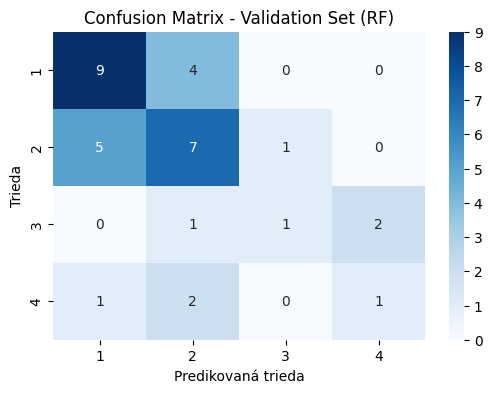

In [ ]:
# Trenovanie Random Forestu
rf_classifier = RandomForestClassifier(random_state=42)

# Nastavenie 5-násobnej krížovej validácie
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Vypočítanie skóre pre každý fold
accuracy_scores = cross_val_score(rf_classifier, X_train, y_train, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(rf_classifier, X_train, y_train, cv=cv, scoring='f1_macro')

print("Fold Accuracy Scores:", accuracy_scores)
print("Fold F1 Scores:", f1_scores)

# Vyhodnotenie na validačnej množine
rf_classifier.fit(X_train, y_train)
y_valid_pred = rf_classifier.predict(X_valid)
valid_accuracy_RF1 = accuracy_score(y_valid, y_valid_pred)
valid_f1_RF1 = f1_score(y_valid, y_valid_pred, average='macro')

print("Validation Set Accuracy:", valid_accuracy_RF1)
print("Validation Set F1 Score:", valid_f1_RF1)

# Zobrazenie confusion matrixu vo forme heatmapy
cm_valid = confusion_matrix(y_valid, y_valid_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_valid, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf_classifier.classes_,
            yticklabels=rf_classifier.classes_)
plt.xlabel("Predikovaná trieda")
plt.ylabel("Trieda")
plt.title("Confusion Matrix - Validation Set (RF)")
plt.show()

**XGBoost model**

5-fold Accuracy: [0.49019608 0.52941176 0.49019608 0.43137255 0.5       ]
5-fold F1 Score: [0.38888889 0.4559411  0.29166667 0.29154334 0.51809211]
Validation Set Accuracy: 0.47058823529411764
Validation Set F1 Score: 0.37925925925925924


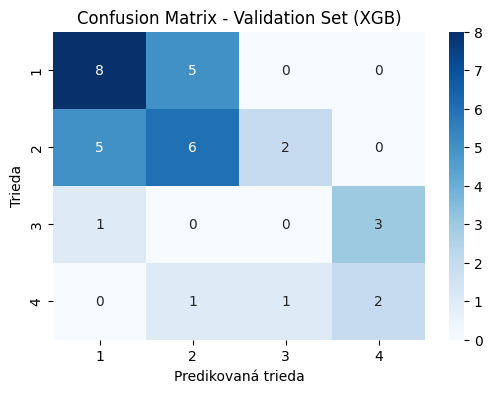

In [ ]:
# Encoding indexov cielovej premmenej ([1,2,3,4] -> [0,1,2,3])
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_valid_enc = le.transform(y_valid)

# Základné parametre XGBoostu
xgb_classifier = xgb.XGBClassifier(random_state=42)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(xgb_classifier, X_train, y_train_enc, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(xgb_classifier, X_train, y_train_enc, cv=cv, scoring='f1_macro')
print("5-fold Accuracy:", accuracy_scores)
print("5-fold F1 Score:", f1_scores)

# Trénovanie modelu
xgb_classifier.fit(X_train, y_train_enc)

# Vyhodnotenie modelu na validačnej sete
y_valid_pred_enc = xgb_classifier.predict(X_valid)
valid_accuracy_XGB1 = accuracy_score(y_valid_enc, y_valid_pred_enc)
valid_f1_XGB1 = f1_score(y_valid_enc, y_valid_pred_enc, average='macro')

print("Validation Set Accuracy:", valid_accuracy_XGB1)
print("Validation Set F1 Score:", valid_f1_XGB1)

# Zobrazenie Confusion Matrixu validačného setu v heatmape
cm_valid = confusion_matrix(y_valid_enc, y_valid_pred_enc)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_valid, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predikovaná trieda")
plt.ylabel("Trieda")
plt.title("Confusion Matrix - Validation Set (XGB)")
plt.show()

**Support Vector Machine**

5-fold Accuracy: [0.58823529 0.56862745 0.54901961 0.47058824 0.46      ]
5-fold F1 Score: [0.51515152 0.43743079 0.40794557 0.26719446 0.38337832]
Validation Set Accuracy: 0.4411764705882353
Validation Set F1 Score: 0.32586618876941453


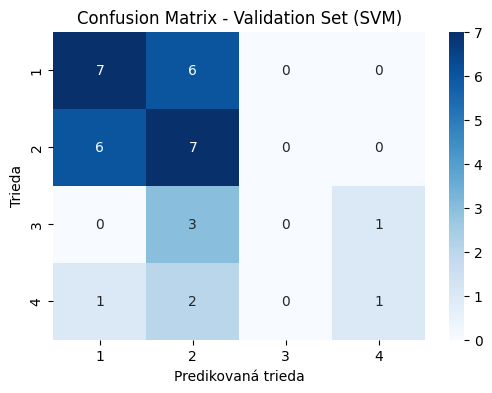

In [ ]:
# Štandardizácia dát
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Základné nastavenie modelu
svm_classifier = SVC(random_state=42)


# Nastavenie 5-násobnej krížovej validácie
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Vypočítanie skóre pre každý fold
svm_accuracy_scores = cross_val_score(svm_classifier, X_train_scaled, y_train, cv=cv, scoring='accuracy')
svm_f1_scores = cross_val_score(svm_classifier, X_train_scaled, y_train, cv=cv, scoring='f1_macro')

print("5-fold Accuracy:", svm_accuracy_scores)
print("5-fold F1 Score:", svm_f1_scores)


# Trénovanie modelu
svm_classifier.fit(X_train_scaled, y_train)

# Vyhodnotenie modelu na validačnom sete
y_valid_pred = svm_classifier.predict(X_valid_scaled)
valid_accuracy_SVM1 = accuracy_score(y_valid, y_valid_pred)
valid_f1_SVM1 = f1_score(y_valid, y_valid_pred, average='macro')

print("Validation Set Accuracy:", valid_accuracy_SVM1)
print("Validation Set F1 Score:", valid_f1_SVM1)

# Zobrazenie Confiuson Matrixu validačného setu v heatmape
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_valid, y_valid_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_classifier.classes_,
            yticklabels=svm_classifier.classes_)
plt.xlabel("Predikovaná trieda")
plt.ylabel("Trieda")
plt.title("Confusion Matrix - Validation Set (SVM)")
plt.show()

**Logistic regression**

5-fold Accuracy: [0.52941176 0.45098039 0.49019608 0.56862745 0.52      ]
5-fold F1 Score: [0.46843434 0.3020527  0.43066709 0.36533032 0.49633459]
Validation Set Accuracy: 0.47058823529411764
Validation Set F1 Score: 0.3803418803418804


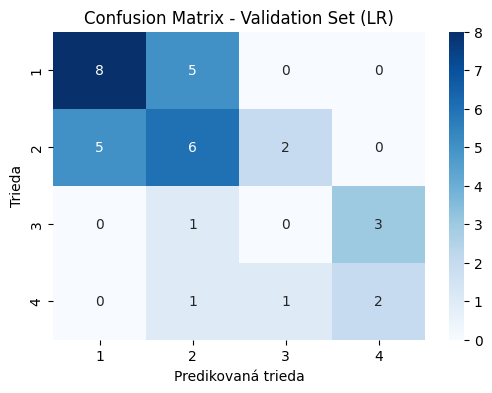

In [ ]:
# Štandardizácia dát rovnako ako pri SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Základné nastavenie modelu
logreg = LogisticRegression(random_state=42)

# Nastavenie 5 násobneej krížovej validácie
cv = KFold(n_splits=5, shuffle=True, random_state=42)
lr_accuracy_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=cv, scoring='accuracy')
lr_f1_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=cv, scoring='f1_macro')

print("5-fold Accuracy:", lr_accuracy_scores)
print("5-fold F1 Score:", lr_f1_scores)

# Trénovanie modelu
logreg.fit(X_train_scaled, y_train)

# Vyhodnotenie modelu na validačnom sete
y_valid_pred = logreg.predict(X_valid_scaled)
valid_accuracy_LR1 = accuracy_score(y_valid, y_valid_pred)
valid_f1_LR1 = f1_score(y_valid, y_valid_pred, average='macro')

print("Validation Set Accuracy:", valid_accuracy_LR1)
print("Validation Set F1 Score:", valid_f1_LR1)

# Zobrazenie Confusion Matrixu validačného setu v heatmape
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_valid, y_valid_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=logreg.classes_,
            yticklabels=logreg.classes_)
plt.xlabel("Predikovaná trieda")
plt.ylabel("Trieda")
plt.title("Confusion Matrix - Validation Set (LR)")
plt.show()

**Naive Bayes**

5-fold Accuracy: [0.37254902 0.41176471 0.39215686 0.35294118 0.42      ]
5-fold F1 Score: [0.36269285 0.29059036 0.28260281 0.25911865 0.40659879]
Validation Set Accuracy: 0.4117647058823529
Validation Set F1 Score: 0.3842203548085901


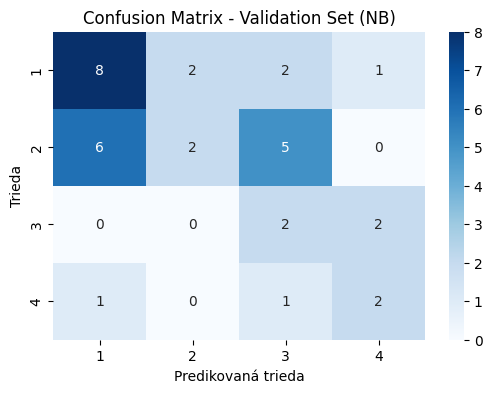

In [ ]:
# Základné nastavenie a trénovanie modelu
nb_classifier = GaussianNB()

# Nastavenie 5-násobnej krížovej validácie
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Vypočítanie skóre pre každý fold
nb_accuracy_scores = cross_val_score(nb_classifier, X_train, y_train, cv=cv, scoring='accuracy')
nb_f1_scores = cross_val_score(nb_classifier, X_train, y_train, cv=cv, scoring='f1_macro')
print("5-fold Accuracy:", nb_accuracy_scores)
print("5-fold F1 Score:", nb_f1_scores)

# Trénovanie modelu na celom tréningovom sete
nb_classifier.fit(X_train, y_train)

# Výsledky modelu na validačnom sete
y_valid_pred = nb_classifier.predict(X_valid)
valid_accuracy_NB1 = accuracy_score(y_valid, y_valid_pred)
valid_f1_NB1 = f1_score(y_valid, y_valid_pred, average='macro')

print("Validation Set Accuracy:", valid_accuracy_NB1)
print("Validation Set F1 Score:", valid_f1_NB1)

# Zobrazenie Confusion Matrixu validačného setu v heatmape
cm_valid = confusion_matrix(y_valid, y_valid_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_valid, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb_classifier.classes_,
            yticklabels=nb_classifier.classes_)
plt.xlabel("Predikovaná trieda")
plt.ylabel("Trieda")
plt.title("Confusion Matrix - Validation Set (NB)")
plt.show()

**kNN**

5-fold Accuracy: [0.52941176 0.49019608 0.41176471 0.39215686 0.44      ]
5-fold F1 Score: [0.46805019 0.39455288 0.23119919 0.22345804 0.35308587]
Validation Set Accuracy: 0.4411764705882353
Validation Set F1 Score: 0.42057453416149065


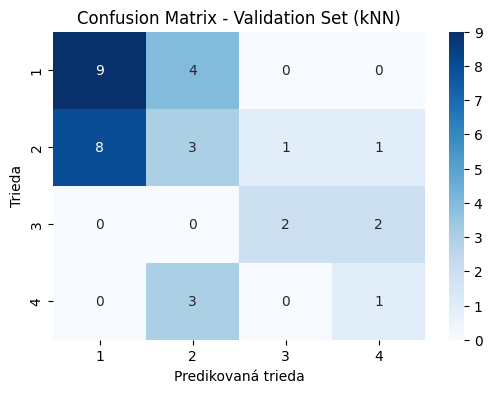

In [ ]:
# Rovnaká štandardizácia ako pri LR a SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)


# Nastavenie 5-násobnej krížovej validácie
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Nastavenie modelu
knn_model = KNeighborsClassifier()

# Vypočítanie skóre pre každý fold
knn_accuracy_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
knn_f1_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=cv, scoring='f1_macro')

print("5-fold Accuracy:", knn_accuracy_scores)
print("5-fold F1 Score:", knn_f1_scores)


# Trénovanie modelu
knn_model.fit(X_train_scaled, y_train)

# Výsledky modelu na validačnom sete
y_valid_pred = knn_model.predict(X_valid_scaled)
valid_accuracy_kNN1 = accuracy_score(y_valid, y_valid_pred)
valid_f1_kNN1 = f1_score(y_valid, y_valid_pred, average='macro')

print("Validation Set Accuracy:", valid_accuracy_kNN1)
print("Validation Set F1 Score:", valid_f1_kNN1)

# Zobrazenie Confusion Matrixu validačného setu v heatmape
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_valid, y_valid_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=knn_model.classes_,
            yticklabels=knn_model.classes_)
plt.xlabel("Predikovaná trieda")
plt.ylabel("Trieda")
plt.title("Confusion Matrix - Validation Set (kNN)")
plt.show()

# **Prípadová štúdia 2**


*   10 najvhodnejších indexov na základe korelácie
*   základné nastavenie modelov




**Korelácia na zistenie najvhodnejších indexov**

In [ ]:
# Korelácia
corr_matrix = df[feature_columns].corr()
print(corr_matrix)

In [ ]:
feature_columns = [
    "asl", "asw", "mistrik", "avg_word_length", "lexical_density",
    "MATTR", "C_TTR", "TAG_norm_entropy", "FRE_Czech", "FKG_Czech"
]

**Random Forest 10 Najvhodnejších indexov**

Fold Accuracy Scores: [0.52941176 0.60784314 0.62745098 0.37254902 0.46      ]
Fold F1 Scores: [0.41518049 0.54097706 0.47254296 0.21338384 0.45892396]
Validation Set Accuracy: 0.5294117647058824
Validation Set F1 Score: 0.4451058201058201


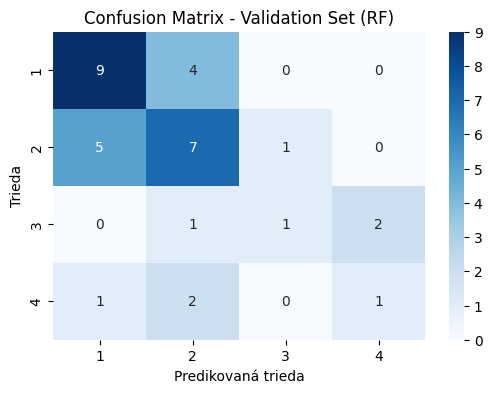

In [ ]:
# Trenovanie Random Forestu
rf_classifier = RandomForestClassifier(random_state=42)

# Nastavenie 5-násobnej krížovej validácie
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Vypočítanie skóre pre každý fold
accuracy_scores = cross_val_score(rf_classifier, X_train, y_train, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(rf_classifier, X_train, y_train, cv=cv, scoring='f1_macro')

print("Fold Accuracy Scores:", accuracy_scores)
print("Fold F1 Scores:", f1_scores)

# Vyhodnotenie na validačnej množine
rf_classifier.fit(X_train, y_train)
y_valid_pred = rf_classifier.predict(X_valid)
valid_accuracy_RF2 = accuracy_score(y_valid, y_valid_pred)
valid_f1_RF2 = f1_score(y_valid, y_valid_pred, average='macro')

print("Validation Set Accuracy:", valid_accuracy_RF2)
print("Validation Set F1 Score:", valid_f1_RF2)

# Zobrazenie confusion matrixu vo forme heatmapy
cm_valid = confusion_matrix(y_valid, y_valid_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_valid, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf_classifier.classes_,
            yticklabels=rf_classifier.classes_)
plt.xlabel("Predikovaná trieda")
plt.ylabel("Trieda")
plt.title("Confusion Matrix - Validation Set (RF)")
plt.show()

**XGBoost 10 Najvhodnejších indexov**

5-fold Accuracy: [0.33333333 0.41176471 0.52941176 0.39215686 0.38      ]
5-fold F1 Score: [0.23783892 0.3372449  0.35737179 0.3045843  0.42654915]
Validation Set Accuracy: 0.5
Validation Set F1 Score: 0.35225885225885223


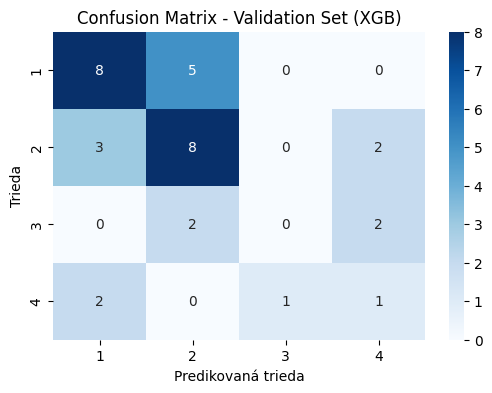

In [ ]:
# Encoding indexov cielovej premmenej ([1,2,3,4] -> [0,1,2,3])
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_valid_enc = le.transform(y_valid)

X_train = train_df[feature_columns]
y_train = train_df["Rocnik"]
X_valid = valid_df[feature_columns]
y_valid = valid_df["Rocnik"]

# Základné nastavenie XGBoostu
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Nastavenie 5-násobnej krížovej validácie
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Vypočítanie skóre pre každý fold
accuracy_scores = cross_val_score(xgb_classifier, X_train, y_train_enc, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(xgb_classifier, X_train, y_train_enc, cv=cv, scoring='f1_macro')

print("5-fold Accuracy:", accuracy_scores)
print("5-fold F1 Score:", f1_scores)

# Trénovanie modelu na celom tréningovom sete
xgb_classifier.fit(X_train, y_train_enc)

# Vyhodnotenie modelu na validačnom sete
y_valid_pred_enc = xgb_classifier.predict(X_valid)
valid_accuracy_XGB2 = accuracy_score(y_valid_enc, y_valid_pred_enc)
valid_f1_XGB2 = f1_score(y_valid_enc, y_valid_pred_enc, average='macro')

print("Validation Set Accuracy:", valid_accuracy_XGB2)
print("Validation Set F1 Score:", valid_f1_XGB2)

# Zobrazenie Confusion Matrixu validačného setu v heatmape
cm_valid = confusion_matrix(y_valid_enc, y_valid_pred_enc)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_valid, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predikovaná trieda")
plt.ylabel("Trieda")
plt.title("Confusion Matrix - Validation Set (XGB)")
plt.show()

**Support Vector Machine SVM 10 Najvhodnejších indexov**

5-fold Accuracy: [0.52941176 0.52941176 0.52941176 0.49019608 0.44      ]
5-fold F1 Score: [0.36031746 0.41725328 0.35572548 0.27828054 0.37064991]
Validation Set Accuracy: 0.5294117647058824
Validation Set F1 Score: 0.3766427718040621


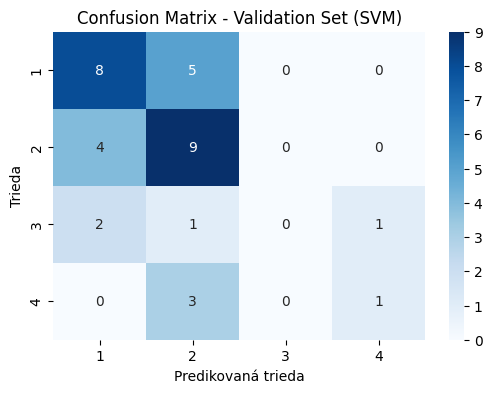

In [ ]:
# Štandardizácia dát
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Základné nastavenie modelu
svm_classifier = SVC(random_state=42)


# Nastavenie 5-násobnej krížovej validácie
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Vypočítanie skóre pre každý fold
svm_accuracy_scores = cross_val_score(svm_classifier, X_train_scaled, y_train, cv=cv, scoring='accuracy')
svm_f1_scores = cross_val_score(svm_classifier, X_train_scaled, y_train, cv=cv, scoring='f1_macro')

print("5-fold Accuracy:", svm_accuracy_scores)
print("5-fold F1 Score:", svm_f1_scores)


# Trénovanie modelu
svm_classifier.fit(X_train_scaled, y_train)

# Vyhodnotenie modelu na validačnom sete
y_valid_pred = svm_classifier.predict(X_valid_scaled)
valid_accuracy_SVM2 = accuracy_score(y_valid, y_valid_pred)
valid_f1_SVM2 = f1_score(y_valid, y_valid_pred, average='macro')

print("Validation Set Accuracy:", valid_accuracy_SVM2)
print("Validation Set F1 Score:", valid_f1_SVM2)

# Zobrazenie Confiuson Matrixu validačného setu v heatmape
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_valid, y_valid_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_classifier.classes_,
            yticklabels=svm_classifier.classes_)
plt.xlabel("Predikovaná trieda")
plt.ylabel("Trieda")
plt.title("Confusion Matrix - Validation Set (SVM)")
plt.show()

**Logistic Regression 10 Najvhodnejších indexov**

5-fold Accuracy: [0.52941176 0.56862745 0.54901961 0.49019608 0.42      ]
5-fold F1 Score: [0.43588951 0.37594793 0.46735419 0.32400104 0.43619669]
Validation Set Accuracy: 0.5294117647058824
Validation Set F1 Score: 0.4157088122605364


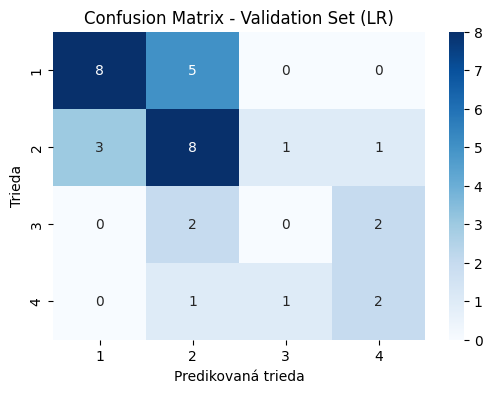

In [ ]:
# Štandardizácia dát rovnako ako pri SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Základné nastavenie modelu
logreg = LogisticRegression(random_state=42)

# Nastavenie 5 násobneej krížovej validácie
cv = KFold(n_splits=5, shuffle=True, random_state=42)
lr_accuracy_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=cv, scoring='accuracy')
lr_f1_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=cv, scoring='f1_macro')

print("5-fold Accuracy:", lr_accuracy_scores)
print("5-fold F1 Score:", lr_f1_scores)

# Trénovanie modelu
logreg.fit(X_train_scaled, y_train)

# Vyhodnotenie modelu na validačnom sete
y_valid_pred = logreg.predict(X_valid_scaled)
valid_accuracy_LR2 = accuracy_score(y_valid, y_valid_pred)
valid_f1_LR2 = f1_score(y_valid, y_valid_pred, average='macro')

print("Validation Set Accuracy:", valid_accuracy_LR2)
print("Validation Set F1 Score:", valid_f1_LR2)

# Zobrazenie Confusion Matrixu validačného setu v heatmape
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_valid, y_valid_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=logreg.classes_,
            yticklabels=logreg.classes_)
plt.xlabel("Predikovaná trieda")
plt.ylabel("Trieda")
plt.title("Confusion Matrix - Validation Set (LR)")
plt.show()

**Naive Bayes 10 Najvhodnejších indexov**

5-fold Accuracy: [0.45098039 0.41176471 0.47058824 0.45098039 0.4       ]
5-fold F1 Score: [0.38155929 0.35536797 0.36960956 0.34844695 0.39995218]
Validation Set Accuracy: 0.4117647058823529
Validation Set F1 Score: 0.33967391304347827


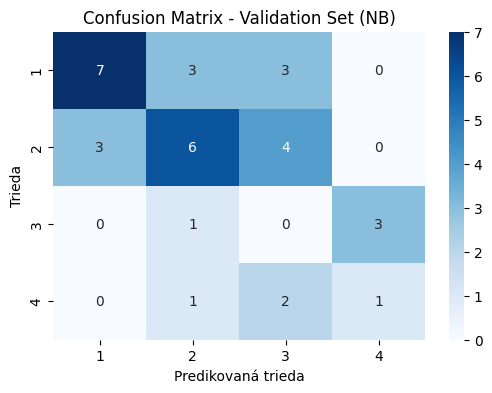

In [ ]:
# Základné nastavenie a trénovanie modelu
nb_classifier = GaussianNB()

# Nastavenie 5-násobnej krížovej validácie
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Vypočítanie skóre pre každý fold
nb_accuracy_scores = cross_val_score(nb_classifier, X_train, y_train, cv=cv, scoring='accuracy')
nb_f1_scores = cross_val_score(nb_classifier, X_train, y_train, cv=cv, scoring='f1_macro')
print("5-fold Accuracy:", nb_accuracy_scores)
print("5-fold F1 Score:", nb_f1_scores)

# Trénovanie modelu na celom tréningovom sete
nb_classifier.fit(X_train, y_train)

# Výsledky modelu na validačnom sete
y_valid_pred = nb_classifier.predict(X_valid)
valid_accuracy_NB2 = accuracy_score(y_valid, y_valid_pred)
valid_f1_NB2 = f1_score(y_valid, y_valid_pred, average='macro')

print("Validation Set Accuracy:", valid_accuracy_NB2)
print("Validation Set F1 Score:", valid_f1_NB2)

# Zobrazenie Confusion Matrixu validačného setu v heatmape
cm_valid = confusion_matrix(y_valid, y_valid_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_valid, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb_classifier.classes_,
            yticklabels=nb_classifier.classes_)
plt.xlabel("Predikovaná trieda")
plt.ylabel("Trieda")
plt.title("Confusion Matrix - Validation Set (NB)")
plt.show()

**kNN 10 Najvhodnejších indexov**

5-fold Accuracy: [0.31372549 0.49019608 0.50980392 0.39215686 0.4       ]
5-fold F1 Score: [0.22361111 0.38125    0.34738693 0.26061412 0.33364662]
Validation Set Accuracy: 0.5294117647058824
Validation Set F1 Score: 0.46296296296296297


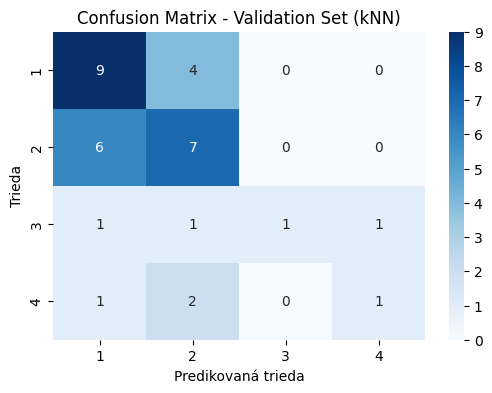

In [ ]:
# Rovnaká štandardizácia ako pri LR a SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Nastavenie modelu
knn_model = KNeighborsClassifier()

knn_accuracy_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
knn_f1_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=cv, scoring='f1_macro')
print("5-fold Accuracy:", knn_accuracy_scores)
print("5-fold F1 Score:", knn_f1_scores)

# Trénovanie modelu
knn_model.fit(X_train_scaled, y_train)

# Výsledky modelu na validačnom sete
y_valid_pred = knn_model.predict(X_valid_scaled)
valid_accuracy_kNN2 = accuracy_score(y_valid, y_valid_pred)
valid_f1_kNN2 = f1_score(y_valid, y_valid_pred, average='macro')

print("Validation Set Accuracy:", valid_accuracy_kNN2)
print("Validation Set F1 Score:", valid_f1_kNN2)

# Zobrazenie Confusion Matrixu validačného setu v heatmape
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_valid, y_valid_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=knn_model.classes_,
            yticklabels=knn_model.classes_)
plt.xlabel("Predikovaná trieda")
plt.ylabel("Trieda")
plt.title("Confusion Matrix - Validation Set (kNN)")
plt.show()

# **Prípadová štúdia 3**


*   Použitie 10 najvhodnejších indexov
*   Pomocou funkcie získané najvhodnejšie parametre pre model.



**Random Forest**

Najlepšie parametre: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Najlepšia priemerná presnosť (cross-validation): 0.43725490196078437
5-fold Accuracy: [0.37254902 0.50980392 0.52941176 0.41176471 0.44      ]
5-fold F1 Score: [0.26291342 0.49779785 0.4061086  0.30572679 0.44261563]
Validation Set Accuracy: 0.6470588235294118
Validation Set F1 Score: 0.5108225108225108


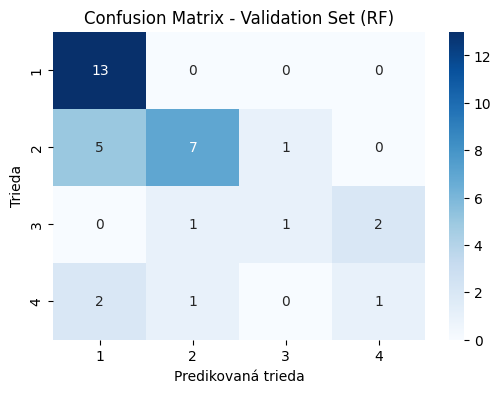

In [ ]:
# Definícia parameter gridu
param_grid = {
    'bootstrap': [False],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 3],
    'min_samples_split': [5],
    'n_estimators': [100, 200, 300],
}

# Základne nastavenie modelu
rf = RandomForestClassifier(random_state=42)

# Nastavenie GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Vypísanie najlepších parametrov a priemernej cross-validovanej presnosti
print("Najlepšie parametre:", grid_search.best_params_)
print("Najlepšia priemerná presnosť (cross-validation):", grid_search.best_score_)

# Vypočet skóre pre jednotlivé foldre
cv = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=cv, scoring='f1_macro')
print("5-fold Accuracy:", accuracy_scores)
print("5-fold F1 Score:", f1_scores)

# Trénovanie modelu na celom tréningovom sete s najlepšími parametrami
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Vyhodnotenie modelu na validačnom sete
y_valid_pred = best_rf.predict(X_valid)
valid_accuracy_RF3 = accuracy_score(y_valid, y_valid_pred)
valid_f1_RF3 = f1_score(y_valid, y_valid_pred, average='macro')
print("Validation Set Accuracy:", valid_accuracy_RF3)
print("Validation Set F1 Score:", valid_f1_RF3)

# Zobrazenie Confusion Matrixu validačného setu v heatmape
cm_valid = confusion_matrix(y_valid, y_valid_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_valid, annot=True, fmt="d", cmap="Blues",
            xticklabels=best_rf.classes_,
            yticklabels=best_rf.classes_)
plt.xlabel("Predikovaná trieda")
plt.ylabel("Trieda")
plt.title("Confusion Matrix - Validation Set (RF)")
plt.show()

**XGBoost**

Najlepšie parametre: {'colsample_bytree': 0.8, 'eval_metric': 'mlogloss', 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'num_class': 4, 'objective': 'multi:softmax', 'subsample': 0.8}
Najlepšia priemerná presnosť (cross-validation): 0.4568627450980392
5-fold Accuracy: [0.41176471 0.43137255 0.52941176 0.39215686 0.42      ]
5-fold F1 Score: [0.3634839  0.33637427 0.35397345 0.32566519 0.46558818]
Validation Set Accuracy: 0.5294117647058824
Validation Set F1 Score: 0.40644078144078144


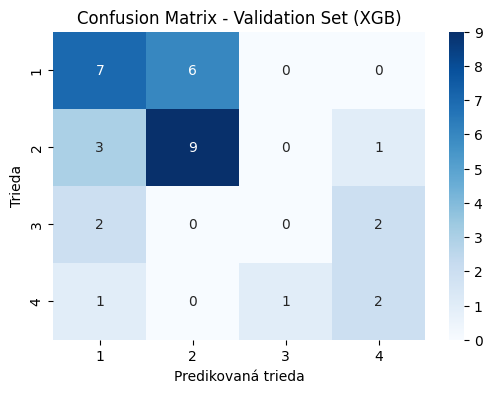

In [ ]:
# Zmena indexovania cielovej premmenej ([1,2,3,4] -> [0,1,2,3])
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_valid_enc = le.transform(y_valid)

# Definicia rôznych hodnôt hyperparametrov modelu
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'objective': ['multi:softmax'],  # pre multi-class klasifikáciu
    'num_class': [4],                # máme 4 triedy po zakódovaní
    'eval_metric': ['mlogloss']
}

# Základne parametre modelu
xgb_classifier = xgb.XGBClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,  # Nastavenie 5-fold krížovej validácie
                           n_jobs=-1)
grid_search.fit(X_train, y_train_enc)

print("Najlepšie parametre:", grid_search.best_params_)
print("Najlepšia priemerná presnosť (cross-validation):", grid_search.best_score_)

# Použitie najlepšieho modelu
best_xgb = grid_search.best_estimator_
best_xgb.fit(X_train, y_train_enc)

# 5-fold krížová validácia a vypísanie skóre pre každý fold
cv = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(best_xgb, X_train, y_train_enc, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(best_xgb, X_train, y_train_enc, cv=cv, scoring='f1_macro')
print("5-fold Accuracy:", accuracy_scores)
print("5-fold F1 Score:", f1_scores)


# Vyhodnotenie modelu na validačnom sete
y_valid_pred_enc = best_xgb.predict(X_valid)
valid_accuracy_XGB3 = accuracy_score(y_valid_enc, y_valid_pred_enc)
valid_f1_XGB3 = f1_score(y_valid_enc, y_valid_pred_enc, average='macro')

print("Validation Set Accuracy:", valid_accuracy_XGB3)
print("Validation Set F1 Score:", valid_f1_XGB3)

# Zobrazenie Confusion Matrixu validačného setu v heatmape
cm_valid = confusion_matrix(y_valid_enc, y_valid_pred_enc)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_valid, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predikovaná trieda")
plt.ylabel("Trieda")
plt.title("Confusion Matrix - Validation Set (XGB)")
plt.show()

**Support Vector Machine**

Najlepšie parametre: {'C': 10, 'kernel': 'linear'}
Najlepšia priemerná presnosť (cross-validation): 0.5163921568627451
5-fold Accuracy: [0.58823529 0.54901961 0.50980392 0.49019608 0.52      ]
5-fold F1 Score: [0.44182692 0.38449848 0.40313853 0.32051672 0.52349904]
Validation Set Accuracy: 0.5882352941176471
Validation Set F1 Score: 0.4878917378917379


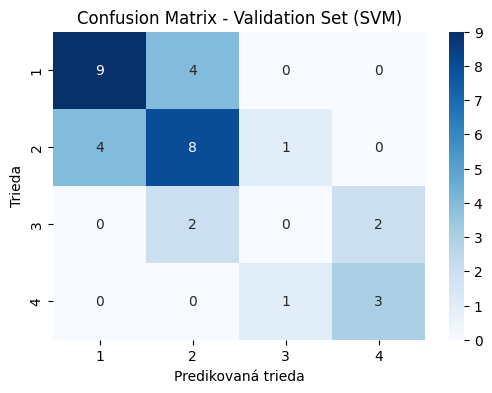

In [ ]:
# Štandardizácia dát
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Definícia rôznych hodnôt hyperparametrov modelu
param_grid = [
    {
        'kernel': ['rbf'],
        'C': [10, 50, 100, 200, 500],
        'gamma': [0.0001, 0.001, 0.01, 0.1]
    },
    {
        'kernel': ['poly'],
        'C': [10, 50, 100, 200, 500],
        'gamma': [0.0001, 0.001, 0.01, 0.1],
        'degree': [2, 3, 4]
    },
    {
        'kernel': ['linear'],
        'C': [10, 50, 100, 200, 500]
    }
]

# Základné nastavenie modelu
svm_classifier = SVC(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=svm_classifier,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,          # Nastavenie 5-fold krížovej validácie
                           n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Najlepšie parametre:", grid_search.best_params_)
print("Najlepšia priemerná presnosť (cross-validation):", grid_search.best_score_)

# Použitie najlepšieho modelu
best_svm = grid_search.best_estimator_

# 5-fold krížová validácia
cv = KFold(n_splits=5, shuffle=True, random_state=42)
svm_accuracy_scores = cross_val_score(best_svm, X_train_scaled, y_train, cv=cv, scoring='accuracy')
svm_f1_scores = cross_val_score(best_svm, X_train_scaled, y_train, cv=cv, scoring='f1_macro')

print("5-fold Accuracy:", svm_accuracy_scores)
print("5-fold F1 Score:", svm_f1_scores)


# Trénovanie modelu s najlepšími parametrami
best_svm.fit(X_train_scaled, y_train)

# Vyhodnotenie modelu na validačnom sete
y_valid_pred = best_svm.predict(X_valid_scaled)
valid_accuracy_SVM3 = accuracy_score(y_valid, y_valid_pred)
valid_f1_SVM3 = f1_score(y_valid, y_valid_pred, average='macro')

print("Validation Set Accuracy:", valid_accuracy_SVM3)
print("Validation Set F1 Score:", valid_f1_SVM3)

# Zobrazenie Confusion Matrixu validačného setu v heatmape
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_valid, y_valid_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=best_svm.classes_,
            yticklabels=best_svm.classes_)
plt.xlabel("Predikovaná trieda")
plt.ylabel("Trieda")
plt.title("Confusion Matrix - Validation Set (SVM)")
plt.show()

**Logistic Regression**

Najlepšie parametre: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
Najlepšia priemerná presnosť (cross-validation): 0.5003921568627451
5-fold Accuracy: [0.52941176 0.50980392 0.54901961 0.50980392 0.42      ]
5-fold F1 Score: [0.38991597 0.35005066 0.42341789 0.29395325 0.46081871]
Validation Set Accuracy: 0.5294117647058824
Validation Set F1 Score: 0.38325652841781876


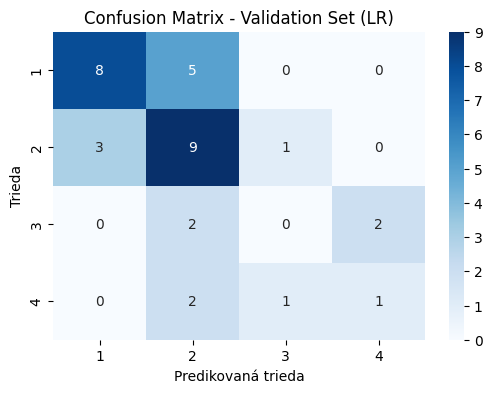

In [ ]:
# Štandardizácia dát rovnako ako pri SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Definícia rôznych hodnôt hyperparametrov modelu
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['lbfgs', 'saga'],
    'penalty': ['l2'],
    'class_weight': [None, 'balanced'],
}

# Základné nastavenie modelu
logreg = LogisticRegression(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=logreg,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Najlepšie parametre:", grid_search.best_params_)
print("Najlepšia priemerná presnosť (cross-validation):", grid_search.best_score_)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
lr_accuracy_scores = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=cv, scoring='accuracy')
lr_f1_scores = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=cv, scoring='f1_macro')
print("5-fold Accuracy:", lr_accuracy_scores)
print("5-fold F1 Score:", lr_f1_scores)

best_logreg = grid_search.best_estimator_

# Vyhodnotenie na validačnom sete
y_valid_pred = best_logreg.predict(X_valid_scaled)
valid_accuracy_LR3 = accuracy_score(y_valid, y_valid_pred)
valid_f1_LR3 = f1_score(y_valid, y_valid_pred, average='macro')

print("Validation Set Accuracy:", valid_accuracy_LR3)
print("Validation Set F1 Score:", valid_f1_LR3)

# Zobrazenie Confusion Matrixu validačného setu v heatmape
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_valid, y_valid_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=best_logreg.classes_,
            yticklabels=best_logreg.classes_)
plt.xlabel("Predikovaná trieda")
plt.ylabel("Trieda")
plt.title("Confusion Matrix - Validation Set (LR)")
plt.show()

Najlepšie parametre: {'var_smoothing': 0.0001}
Najlepšia priemerná presnosť (cross-validation): 0.4134117647058824
5-fold Accuracy: [0.45098039 0.43137255 0.41176471 0.41176471 0.4       ]
5-fold F1 Score: [0.38614499 0.29830195 0.25       0.2281399  0.40350361]
Validation Set Accuracy: 0.5294117647058824
Validation Set F1 Score: 0.43462121212121213


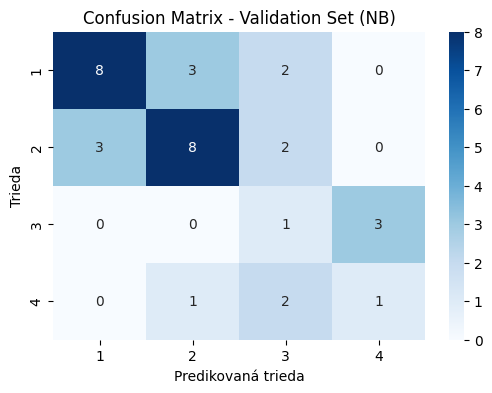

In [ ]:
# Pri Naive Bayes sa hlavne sleduje smoothing
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
}

# Základné nastavenie modelu
nb_classifier = GaussianNB()

# GridSearchCV
grid_search = GridSearchCV(estimator=nb_classifier,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Najlepšie parametre:", grid_search.best_params_)
print("Najlepšia priemerná presnosť (cross-validation):", grid_search.best_score_)

# Použitie najlepších hyperparametrov
best_nb = grid_search.best_estimator_


# Nastavenie 5-násobnej krížovej validácie
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Vypočítanie skóre pre každý fold
nb_accuracy_scores = cross_val_score(best_nb, X_train, y_train, cv=cv, scoring='accuracy')
nb_f1_scores = cross_val_score(best_nb, X_train, y_train, cv=cv, scoring='f1_macro')

print("5-fold Accuracy:", nb_accuracy_scores)
print("5-fold F1 Score:", nb_f1_scores)


# Vyhodnotenie na validačnom sete
y_valid_pred = best_nb.predict(X_valid)
valid_accuracy_NB3 = accuracy_score(y_valid, y_valid_pred)
valid_f1_NB3 = f1_score(y_valid, y_valid_pred, average='macro')

print("Validation Set Accuracy:", valid_accuracy_NB3)
print("Validation Set F1 Score:", valid_f1_NB3)

# Zobrazenie Confusion Matrixu validačného setu v heatmape
cm_valid = confusion_matrix(y_valid, y_valid_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_valid, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_nb.classes_,
            yticklabels=best_nb.classes_)
plt.xlabel("Predikovaná trieda")
plt.ylabel("Trieda")
plt.title("Confusion Matrix - Validation Set (NB)")
plt.show()

**kNN Model**

Najlepšie parametre: {'algorithm': 'auto', 'leaf_size': 30, 'p': 2, 'weights': 'distance'}
Najlepšia priemerná presnosť (cross-validation): 0.44862745098039214
5-fold Accuracy: [0.31372549 0.47058824 0.49019608 0.33333333 0.44      ]
5-fold F1 Score: [0.19493007 0.37095551 0.38159838 0.19751082 0.38237179]
Validation Set Accuracy: 0.5294117647058824
Validation Set F1 Score: 0.3670977011494253


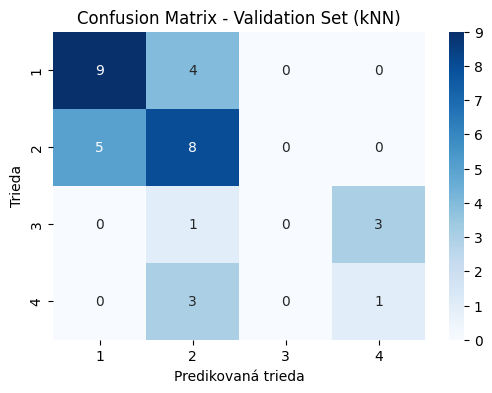

In [ ]:
# Rovnaká štandardizácia ako pri LR a SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Nastavenie rôznych hyperparametrov modelu
param_grid = [
    {
        'n_neighbors': [5],
        'weights': ['uniform'],
        'algorithm': ['auto'],
        'leaf_size': [30],
        'p': [2]
    },
    {
        'weights': ['distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [30, 50, 100],
        'p': [2, 4, 6]
    }
]

# Základné nastavenie modelu
knn = KNeighborsClassifier()

# GridSearchCV
grid_search = GridSearchCV(estimator=knn,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
print("Najlepšie parametre:", grid_search.best_params_)
print("Najlepšia priemerná presnosť (cross-validation):", grid_search.best_score_)


cv = KFold(n_splits=5, shuffle=True, random_state=42)
knn_accuracy_scores = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=cv, scoring='accuracy')
knn_f1_scores = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=cv, scoring='f1_macro')
print("5-fold Accuracy:", knn_accuracy_scores)
print("5-fold F1 Score:", knn_f1_scores)


# Použitie najlepšieho modelu
best_knn = grid_search.best_estimator_

# Vyhodnotenie na validačnej množine
y_valid_pred = best_knn.predict(X_valid_scaled)
valid_accuracy_kNN3 = accuracy_score(y_valid, y_valid_pred)
valid_f1_kNN3 = f1_score(y_valid, y_valid_pred, average='macro')

print("Validation Set Accuracy:", valid_accuracy_kNN3)
print("Validation Set F1 Score:", valid_f1_kNN3)

# Zobrazenie Confusion Matrixu validačného setu v heatmape
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_valid, y_valid_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=best_knn.classes_,
            yticklabels=best_knn.classes_)
plt.xlabel("Predikovaná trieda")
plt.ylabel("Trieda")
plt.title("Confusion Matrix - Validation Set (kNN)")
plt.show()

# **Prípadová štúdia 4**


*   Rozšírenie korpusu
*   Zmena klasifikácie cielovej premennej z viactriednej na binárnu



In [ ]:
df_rozsirene = pd.read_csv('Korpus_rozsireny_indexy.csv', sep=",")

In [ ]:
# Štatistika rozšíreného korpusu
def calculate_sentence_stats(text):
    doc = nlp(text)
    total_sentences = len(doc.sentences)
    word_count = 0
    token_count = 0
    short_sentence_count = 0
    long_sentence_count = 0

    for sentence in doc.sentences:
        # Počet tokenov iba slová slová
        words_in_sentence = [token.text for token in sentence.words if token.text.isalpha()]
        # Počet tokenov aj s interpunkciou
        tokens_in_sentence = [token.text for token in sentence.words]

        word_count += len(words_in_sentence)
        token_count += len(tokens_in_sentence)

        # Ak má veta 4 alebo menej slov označí za krátku inak za dlhú
        if len(words_in_sentence) <= 4:
            short_sentence_count += 1
        else:
            long_sentence_count += 1

    return word_count, token_count, total_sentences, short_sentence_count, long_sentence_count


stats = df_rozsirene['Obsah'].apply(lambda text: pd.Series(
    calculate_sentence_stats(text),
    index=['pocet slov', 'pocet tokenov', 'pocet viet', 'pocet kratkych viet', 'pocet dlhých viet']
))

df_statistika = pd.concat([df_rozsirene[['Obsah', 'Rocnik', 'Proza/Basen']].reset_index(drop=True),
                           stats.reset_index(drop=True)], axis=1)

# Skupinové zhrnutie podľa 'Rocnik' a 'Proza/Basen' sumárne hodnoty a počet textov
grouped_stats = df_statistika.groupby(['Rocnik', 'Proza/Basen']).agg({
    'pocet slov': 'sum',
    'pocet tokenov': 'sum',
    'pocet viet': 'sum',
    'pocet kratkych viet': 'sum',
    'pocet dlhých viet': 'sum',
    'Obsah': 'count'
}).rename(columns={'Obsah': 'pocet textov'}).reset_index()

print(grouped_stats)

   Rocnik Proza/Basen  pocet slov  pocet tokenov  pocet viet  \
0       1           B        2016           2605         260   
1       1           P       15312          19666        1859   
2       2           B        3170           4173         357   
3       2           P       23687          30353        2664   
4       3           B         867           1111         113   
5       3           P       23243          29655        2524   
6       4           B        1008           1221         112   
7       4           P       34418          43503        3657   

   pocet kratkych viet  pocet dlhých viet  pocet textov  
0                   63                197            40  
1                  459               1400            86  
2                   87                270            44  
3                  603               2061            83  
4                   33                 80             7  
5                  621               1903            46  
6                

In [ ]:
# Vytvorenie 2 skupín
# Skupina 1: texty tried 1-2
# Skupina 2: texty tried 3-4
group1 = df_rozsirene[df_rozsirene['Rocnik'].isin([1, 2])]
group2 = df_rozsirene[df_rozsirene['Rocnik'].isin([3, 4])]

# Rodzelenie dát na trenovaci set dát a zvyšný set dát
train_group1, temp_group1 = train_test_split(group1, test_size=0.2, random_state=42)
train_group2, temp_group2 = train_test_split(group2, test_size=0.2, random_state=42)

# Rozdelenie zvyšneho setu na validačný a testovací set
test_group1, valid_group1 = train_test_split(temp_group1, test_size=0.5, random_state=42)
test_group2, valid_group2 = train_test_split(temp_group2, test_size=0.5, random_state=42)

# Následne spojenie dát aby sme získali rovnomerne rozdelené dáta pre obe skupiny
train_final = pd.concat([train_group1, train_group2])
test_final = pd.concat([test_group1, test_group2])
valid_final = pd.concat([valid_group1, valid_group2])

train_final = train_final.sample(frac=1, random_state=42).reset_index(drop=True)
test_final = test_final.sample(frac=1, random_state=42).reset_index(drop=True)
valid_final = valid_final.sample(frac=1, random_state=42).reset_index(drop=True)

print("Trénovacia množina:", len(train_final))
print("Testovacia množina:", len(test_final))
print("Validačná množina:", len(valid_final))

Trénovacia množina: 287
Testovacia množina: 36
Validačná množina: 37


In [ ]:
# zadefinovanie indexov s ktorými pracujeme rovnako ako pri predošlých štúdiach
feature_columns = [
    "asl", "asw", "mistrik", "avg_word_length", "lexical_density",
    "MATTR", "C_TTR", "TAG_norm_entropy", "FRE_Czech", "FKG_Czech"
]

# Pripravíme vstupné dáta rozšíreného korpusu
# Vytvoríme novú cieľovú premennú 'Group', ktorá priradí hodnoty z 'Rocnik' do dvoch skupín.
X_train = train_final[feature_columns]
y_train = train_final["Rocnik"].apply(lambda x: 0 if x in [1, 2] else 1)

X_test = test_final[feature_columns]
y_test = test_final["Rocnik"].apply(lambda x: 0 if x in [1, 2] else 1)

X_valid = valid_final[feature_columns]
y_valid = valid_final["Rocnik"].apply(lambda x: 0 if x in [1, 2] else 1)


**Random Forest**

5-fold Accuracy: [0.84482759 0.84482759 0.8245614  0.68421053 0.9122807 ]
5-fold F1 Score: [0.80189753 0.8094195  0.78277439 0.63461538 0.88923436]
Validation Set Accuracy: 0.8918918918918919
Validation Set F1 Score: 0.8706293706293706


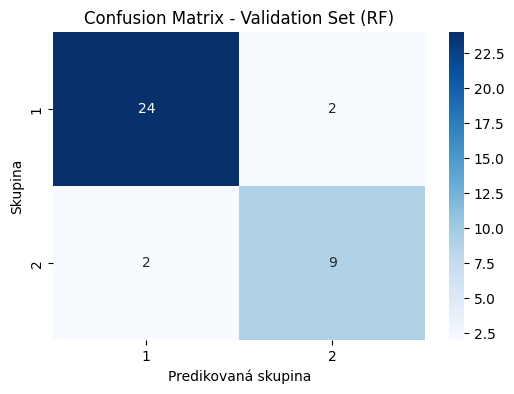

In [ ]:
# Nastavenie hyperparametrov modelu
rf_classifier = RandomForestClassifier(
    bootstrap=False,
    criterion='entropy',
    max_depth=5,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
rf_accuracy_scores = cross_val_score(rf_classifier, X_train, y_train, cv=cv, scoring='accuracy')
rf_f1_scores = cross_val_score(rf_classifier, X_train, y_train, cv=cv, scoring='f1_macro')
print("5-fold Accuracy:", rf_accuracy_scores)
print("5-fold F1 Score:", rf_f1_scores)

# Trénovanie modelu na celom tréningovom sete
rf_classifier.fit(X_train, y_train)

# Vyhodnotenie modelu na validačnom sete
y_valid_pred = rf_classifier.predict(X_valid)
valid_accuracy_RF4 = accuracy_score(y_valid, y_valid_pred)
valid_f1_RF4 = f1_score(y_valid, y_valid_pred, average='macro')
print("Validation Set Accuracy:", valid_accuracy_RF4)
print("Validation Set F1 Score:", valid_f1_RF4)

# Zobrazenie Confusion Matrixu validačného setu v heatmape
cm_valid = confusion_matrix(y_valid, y_valid_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_valid, annot=True, fmt="d", cmap="Blues",
            xticklabels=[1, 2],
            yticklabels=[1, 2])
plt.xlabel("Predikovaná skupina")
plt.ylabel("Skupina")
plt.title("Confusion Matrix - Validation Set (RF)")
plt.show()

**XGBoost**

5-fold Accuracy: [0.86206897 0.86206897 0.8245614  0.71929825 0.89473684]
5-fold F1 Score: [0.82738095 0.83357245 0.78277439 0.65243902 0.86428571]
Validation Set Accuracy: 0.8648648648648649
Validation Set F1 Score: 0.8337825696316262


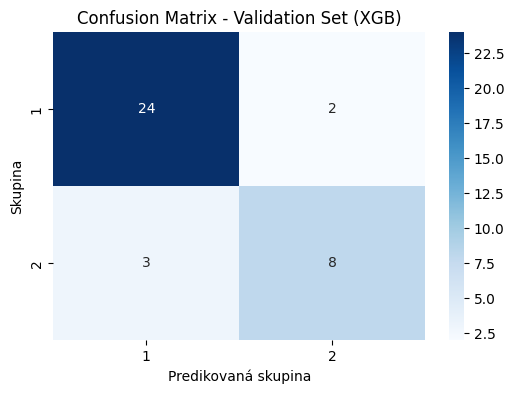

In [ ]:
# Nastavenie hyperparametrov modelu.
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=2,
    eval_metric='mlogloss',
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200,
    colsample_bytree=0.8,
    subsample=0.8,
    random_state=42
)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=cv, scoring='f1_macro')

print("5-fold Accuracy:", accuracy_scores)
print("5-fold F1 Score:", f1_scores)

# Trenovanie modelu
xgb_classifier.fit(X_train, y_train)

# Vyhodnotenie na validačnom sete
y_valid_pred = xgb_classifier.predict(X_valid)
valid_accuracy_XGB4 = accuracy_score(y_valid, y_valid_pred)
valid_f1_XGB4 = f1_score(y_valid, y_valid_pred, average='macro')

print("Validation Set Accuracy:", valid_accuracy_XGB4)
print("Validation Set F1 Score:", valid_f1_XGB4)

# Zobrazenie Confusion Matrixu validačného setu v heatmape
cm_valid = confusion_matrix(y_valid, y_valid_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_valid, annot=True, fmt="d", cmap="Blues",
            xticklabels=[1, 2],
            yticklabels=[1, 2])
plt.xlabel("Predikovaná skupina")
plt.ylabel("Skupina")
plt.title("Confusion Matrix - Validation Set (XGB)")
plt.show()

**Support Vector Machine**

5-fold Accuracy: [0.81034483 0.79310345 0.78947368 0.80701754 0.89473684]
5-fold F1 Score: [0.76706827 0.73023256 0.72857143 0.71820225 0.85797342]
Validation Set Accuracy: 0.8378378378378378
Validation Set F1 Score: 0.7944444444444444


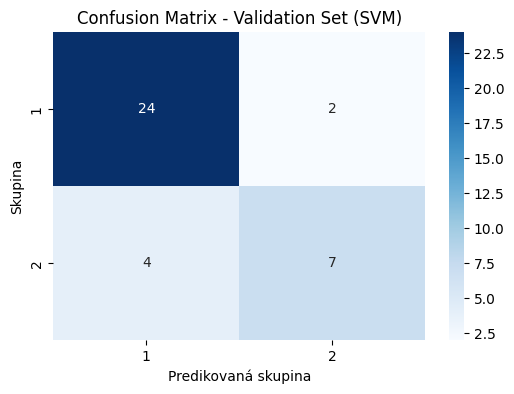

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Nastavenie najlepších hyperparametrov modelu
best_svm = SVC(C=10, kernel='linear', random_state=42)


cv = KFold(n_splits=5, shuffle=True, random_state=42)
svm_accuracy_scores = cross_val_score(best_svm, X_train_scaled, y_train, cv=cv, scoring='accuracy')
svm_f1_scores = cross_val_score(best_svm, X_train_scaled, y_train, cv=cv, scoring='f1_macro')
print("5-fold Accuracy:", svm_accuracy_scores)
print("5-fold F1 Score:", svm_f1_scores)

# Trenovanie modelu
best_svm.fit(X_train_scaled, y_train)

# Vyhodnotenie modelu na validačnom sete
y_valid_pred = best_svm.predict(X_valid_scaled)
valid_accuracy_SVM4 = accuracy_score(y_valid, y_valid_pred)
valid_f1_SVM4 = f1_score(y_valid, y_valid_pred, average='macro')

print("Validation Set Accuracy:", valid_accuracy_SVM4)
print("Validation Set F1 Score:", valid_f1_SVM4)

# Zobrazenie Confusion Matrixu validačného setu v heatmape
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_valid, y_valid_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=[1, 2],
            yticklabels=[1, 2])
plt.xlabel("Predikovaná skupina")
plt.ylabel("Skupina")
plt.title("Confusion Matrix - Validation Set (SVM)")
plt.show()

**Logistic Regression**

5-fold Accuracy: [0.81034483 0.82758621 0.78947368 0.78947368 0.89473684]
5-fold F1 Score: [0.74712644 0.75213675 0.72857143 0.70104895 0.85797342]
Validation Set Accuracy: 0.8378378378378378
Validation Set F1 Score: 0.7944444444444444


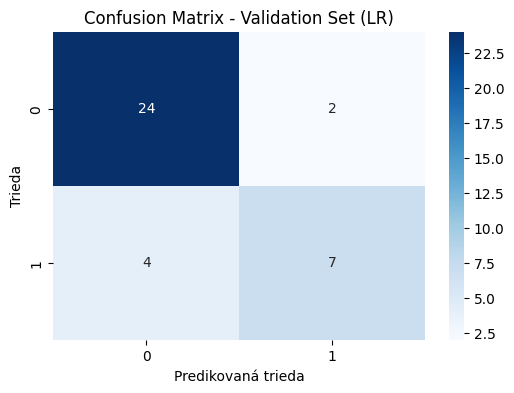

In [ ]:
# Štandardizácia dát rovnako ako pri SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Nastavenie hyperparametrov modelu
best_params = {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
best_logreg = LogisticRegression(**best_params, random_state=42)


cv = KFold(n_splits=5, shuffle=True, random_state=42)
lr_accuracy_scores = cross_val_score(best_logreg, X_train_scaled, y_train, cv=cv, scoring='accuracy')
lr_f1_scores = cross_val_score(best_logreg, X_train_scaled, y_train, cv=cv, scoring='f1_macro')
print("5-fold Accuracy:", lr_accuracy_scores)
print("5-fold F1 Score:", lr_f1_scores)

# Trenovanie modelu
best_logreg.fit(X_train_scaled, y_train)

# Vyhodnotenie na validačnom sete
y_valid_pred = best_logreg.predict(X_valid_scaled)
valid_accuracy_LR4 = accuracy_score(y_valid, y_valid_pred)
valid_f1_LR4 = f1_score(y_valid, y_valid_pred, average='macro')

print("Validation Set Accuracy:", valid_accuracy_LR4)
print("Validation Set F1 Score:", valid_f1_LR4)

# Zobrazenie Confusion Matrixu validačného setu v heatmape
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_valid, y_valid_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=best_logreg.classes_, yticklabels=best_logreg.classes_)
plt.xlabel("Predikovaná trieda")
plt.ylabel("Trieda")
plt.title("Confusion Matrix - Validation Set (LR)")
plt.show()

**Naive bayes**

5-fold Accuracy: [0.70689655 0.74137931 0.75438596 0.80701754 0.75438596]
5-fold F1 Score: [0.56659341 0.52794357 0.60573123 0.73307791 0.57553191]
Validation Set Accuracy: 0.7837837837837838
Validation Set F1 Score: 0.6476190476190476


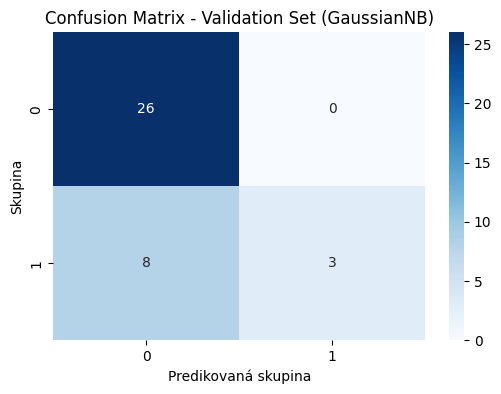

In [ ]:
# Nastavenie hyperparametra modelu
nb_classifier = GaussianNB(var_smoothing=0.0001)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
nb_accuracy_scores = cross_val_score(nb_classifier, X_train, y_train, cv=cv, scoring='accuracy')
nb_f1_scores = cross_val_score(nb_classifier, X_train, y_train, cv=cv, scoring='f1_macro')
print("5-fold Accuracy:", nb_accuracy_scores)
print("5-fold F1 Score:", nb_f1_scores)

# Trénovanie modelu
nb_classifier.fit(X_train, y_train)

# Vyhodnotenie na validačnom sete
y_valid_pred = nb_classifier.predict(X_valid)
valid_accuracy_NB4 = accuracy_score(y_valid, y_valid_pred)
valid_f1_NB4 = f1_score(y_valid, y_valid_pred, average='macro')
print("Validation Set Accuracy:", valid_accuracy_NB4)
print("Validation Set F1 Score:", valid_f1_NB4)

# Zobrazenie Confusion Matrixu validačného setu v heatmape
cm_valid = confusion_matrix(y_valid, y_valid_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_valid, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb_classifier.classes_,
            yticklabels=nb_classifier.classes_)
plt.xlabel("Predikovaná skupina")
plt.ylabel("Skupina")
plt.title("Confusion Matrix - Validation Set (GaussianNB)")
plt.show()

**K - nearest neighbours**

5-fold Accuracy: [0.82758621 0.79310345 0.80701754 0.73684211 0.87719298]
5-fold F1 Score: [0.7751938  0.71753247 0.7654321  0.68013468 0.83813387]
Validation Set Accuracy: 0.8108108108108109
Validation Set F1 Score: 0.7521531100478469


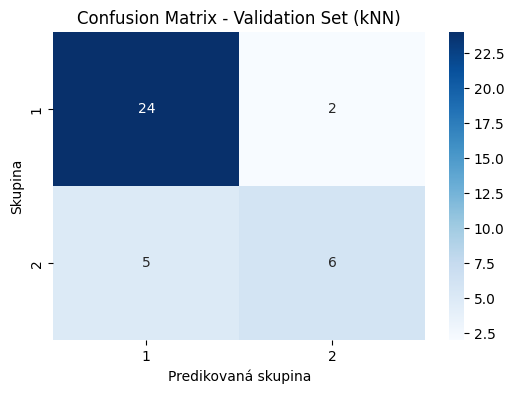

In [ ]:
# Rovnaká štandardizácia dát
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Nastavenie hyperparametrov modelu
best_knn = KNeighborsClassifier(
    algorithm='auto',
    leaf_size=30,
    p=2,
    weights='distance'
)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
knn_accuracy_scores = cross_val_score(best_knn, X_train_scaled, y_train, cv=cv, scoring='accuracy')
knn_f1_scores = cross_val_score(best_knn, X_train_scaled, y_train, cv=cv, scoring='f1_macro')
print("5-fold Accuracy:", knn_accuracy_scores)
print("5-fold F1 Score:", knn_f1_scores)

# Trénovanie modelu
best_knn.fit(X_train_scaled, y_train)

# Vyhodnotenie na validačnom sete
y_valid_pred = best_knn.predict(X_valid_scaled)
valid_accuracy_kNN4 = accuracy_score(y_valid, y_valid_pred)
valid_f1_kNN4 = f1_score(y_valid, y_valid_pred, average='macro')

print("Validation Set Accuracy:", valid_accuracy_kNN4)
print("Validation Set F1 Score:", valid_f1_kNN4)

# Zobrazenie Confusion Matrixu validačného setu v heatmape
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_valid, y_valid_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=[1, 2],
            yticklabels=[1, 2])
plt.xlabel("Predikovaná skupina")
plt.ylabel("Skupina")
plt.title("Confusion Matrix - Validation Set (kNN)")
plt.show()

# **Prípadová štúdia 5**



*   Využitie modelu hlbkoého učenia - SlovakBERT
*   Využitie rozšíreného korpusu
*   Viactriedna klasifikácia cielovej premennej



In [ ]:
# Príprava dát rozšíreného korpusu na prácu s modelom a klasifikáciou do 4 tried
train_df_rozsirene = pd.DataFrame()
test_df_rozsirene = pd.DataFrame()
valid_df_rozsirene = pd.DataFrame()

for clazz in df_rozsirene['Rocnik'].unique():
    class_df = df_rozsirene[df_rozsirene['Rocnik'] == clazz]
    train_class, temp_class = train_test_split(class_df, test_size=0.2, random_state=42)
    test_class, valid_class = train_test_split(temp_class, test_size=0.5, random_state=42)
    train_df_rozsirene = pd.concat([train_df_rozsirene, train_class])
    test_df_rozsirene = pd.concat([test_df_rozsirene, test_class])
    valid_df_rozsirene = pd.concat([valid_df_rozsirene, valid_class])

train_df_rozsirene = train_df_rozsirene.sample(frac=1, random_state=42).reset_index(drop=True)
test_df_rozsirene = test_df_rozsirene.sample(frac=1, random_state=42).reset_index(drop=True)
valid_df_rozsirene = valid_df_rozsirene.sample(frac=1, random_state=42).reset_index(drop=True)

print("Nová tréningová množina:", len(train_df_rozsirene))
print("Nová testovacia množina:", len(test_df_rozsirene))
print("Nová validačná množina:", len(valid_df_rozsirene))

Nová tréningová množina: 286
Nová testovacia množina: 36
Nová validačná množina: 38


In [ ]:
train_class4_rozsirene = train_df_rozsirene[train_df_rozsirene['Rocnik'] == 4].shape[0]
test_class4_rozsirene  = test_df_rozsirene[test_df_rozsirene['Rocnik'] == 4].shape[0]
valid_class4_rozsirene = valid_df_rozsirene[valid_df_rozsirene['Rocnik'] == 4].shape[0]

print("Texty triedy 4 v tréningovej množine:", train_class4_rozsirene)
print("Texty triedy 4 v testovacej množine:", test_class4_rozsirene)
print("Texty triedy 4 vo validačnej množine:", valid_class4_rozsirene)

Texty triedy 4 v tréningovej množine: 43
Texty triedy 4 v testovacej množine: 5
Texty triedy 4 vo validačnej množine: 6


In [ ]:
train_class3_rozsirene = train_df_rozsirene[train_df_rozsirene['Rocnik'] == 3].shape[0]
test_class3_rozsirene = test_df_rozsirene[test_df_rozsirene['Rocnik'] == 3].shape[0]
valid_class3_rozsirene = valid_df_rozsirene[valid_df_rozsirene['Rocnik'] == 3].shape[0]

print("Texty triedy 3 v tréningovej množine:", train_class3_rozsirene)
print("Texty triedy 3 v testovacej množine:", test_class3_rozsirene)
print("Texty triedy 3 vo validačnej množine:", valid_class3_rozsirene)

Texty triedy 3 v tréningovej množine: 42
Texty triedy 3 v testovacej množine: 5
Texty triedy 3 vo validačnej množine: 6


In [ ]:
train_class2_rozsirene = train_df_rozsirene[train_df_rozsirene['Rocnik'] == 2].shape[0]
test_class2_rozsirene  = test_df_rozsirene[test_df_rozsirene['Rocnik'] == 2].shape[0]
valid_class2_rozsirene = valid_df_rozsirene[valid_df_rozsirene['Rocnik'] == 2].shape[0]

print("Texty triedy 2 v tréningovej množine:", train_class2_rozsirene)
print("Texty triedy 2 v testovacej množine:", test_class2_rozsirene)
print("Texty triedy 2 vo validačnej množine:", valid_class2_rozsirene)

Texty triedy 2 v tréningovej množine: 101
Texty triedy 2 v testovacej množine: 13
Texty triedy 2 vo validačnej množine: 13


In [ ]:
train_class1_rozsirene = train_df_rozsirene[train_df_rozsirene['Rocnik'] == 1].shape[0]
test_class1_rozsirene = test_df_rozsirene[test_df_rozsirene['Rocnik'] == 1].shape[0]
valid_class1_rozsirene = valid_df_rozsirene[valid_df_rozsirene['Rocnik'] == 1].shape[0]

print("Texty triedy 1 v tréningovej množine:", train_class1_rozsirene)
print("Texty triedy 1 v testovacej množine:", test_class1_rozsirene)
print("Texty triedy 1 vo validačnej množine:", valid_class1_rozsirene)

Texty triedy 1 v tréningovej množine: 100
Texty triedy 1 v testovacej množine: 13
Texty triedy 1 vo validačnej množine: 13


In [ ]:
!git clone https://github.com/gerulata/slovakbert.git


Cloning into 'slovakbert'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 21 (delta 5), reused 11 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 5.59 KiB | 2.79 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('gerulata/slovakbert')
tokenizer.save_pretrained('./slovakbert')
model = RobertaModel.from_pretrained('gerulata/slovakbert')
model.save_pretrained('./slovakbert')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.13M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/533k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/581 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at gerulata/slovakbert and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Transformer-Based Models Slovak BERT**

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at ./slovakbert and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/286 [00:00<?, ? examples/s]

Map:   0%|          | 0/38 [00:00<?, ? examples/s]

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,No log,1.249957,0.500000,0.302339
2,No log,0.993057,0.605263,0.460562
3,1.177600,1.049956,0.552632,0.411787
4,1.177600,0.751692,0.736842,0.655818
5,1.177600,0.920846,0.605263,0.531982
6,0.718100,0.769599,0.684211,0.642557
7,0.718100,0.737509,0.763158,0.728022
8,0.718100,0.743516,0.789474,0.746693
9,0.332200,0.799315,0.789474,0.765741
10,0.332200,0.841813,0.736842,0.681950


Validation Set Accuracy: 0.7894736842105263
Validation Set F1 Score: 0.7466931216931217


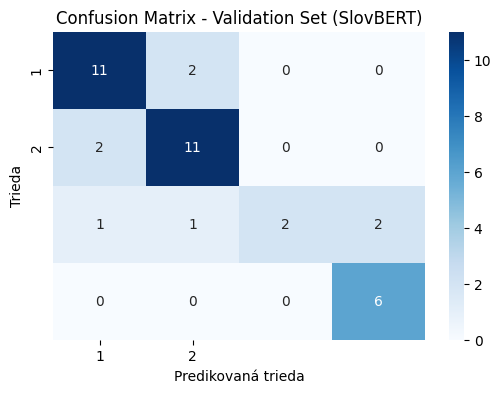

In [ ]:
# Preindeoxvanie cielovej premmenej Rocnik aby zacinala indexom 0
train_df_rozsirene['label'] = train_df_rozsirene['Rocnik'] - 1
valid_df_rozsirene['label'] = valid_df_rozsirene['Rocnik'] - 1
test_df_rozsirene['label']  = test_df_rozsirene['Rocnik'] - 1

# Cesta k uloženemu slovakbertu
model_path = "./slovakbert"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=4)

# Vytvorenie Hugging Face Datasetov
train_dataset = Dataset.from_pandas(train_df_rozsirene[['Obsah', 'label']])
valid_dataset = Dataset.from_pandas(valid_df_rozsirene[['Obsah', 'label']])
test_dataset  = Dataset.from_pandas(test_df_rozsirene[['Obsah', 'label']])

# Tokenizacia
def tokenize_function(example):
    return tokenizer(example["Obsah"], padding="max_length", truncation=True, max_length=300)

train_dataset = train_dataset.map(tokenize_function, batched=True)
valid_dataset = valid_dataset.map(tokenize_function, batched=True)
test_dataset  = test_dataset.map(tokenize_function, batched=True)

# Nastavenie formátu na tensory pre PyTorch.
train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])
valid_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

# Nastavenie modelu
training_args = TrainingArguments(
    output_dir="./sloBERT_results",
    run_name="slovakbert_classification_experiment",
    num_train_epochs=10,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    seed=42,
    report_to=[]
)

# Funkcia na výpočet evaluačných metrík
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    f1_macro = f1_score(labels, predictions, average="macro")
    return {"accuracy": acc, "f1_macro": f1_macro}

# Trenovanie modelu s využitim earlystoppingu na zabranenie pretrenovaniu
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    compute_metrics=compute_metrics,
    eval_dataset=valid_dataset,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)


trainer.train()

# Vyhodnotenie na validačnom sete
predictions = trainer.predict(valid_dataset)
logits = predictions.predictions
labels = predictions.label_ids
preds = np.argmax(logits, axis=-1)

acc = accuracy_score(labels, preds)
f1 = f1_score(labels, preds, average='macro')
print("Validation Set Accuracy:", acc)
print("Validation Set F1 Score:", f1)


# Heat mapa validačného confiuson matrixu
cm_valid = confusion_matrix(labels, preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_valid, annot=True, fmt='d', cmap='Blues',
            xticklabels=[1, 2],
            yticklabels=[1, 2])
plt.xlabel("Predikovaná trieda")
plt.ylabel("Trieda")
plt.title("Confusion Matrix - Validation Set (SlovBERT)")
plt.show()

# **Prípadová štúdia 6**


*   Využitie modelu hlbkohé učenia - SlovakBERT
*   Zmena klasifikácie z viactriednej na binárnu



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at ./slovakbert and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/286 [00:00<?, ? examples/s]

Map:   0%|          | 0/38 [00:00<?, ? examples/s]

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,No log,0.564652,0.684211,0.406250
2,No log,0.246349,0.947368,0.936027
3,0.454300,0.346332,0.894737,0.878205
4,0.454300,0.542337,0.815789,0.734796
5,0.454300,0.722555,0.789474,0.756410


Validation Set Accuracy: 0.9473684210526315
Validation Set F1 Score: 0.936026936026936


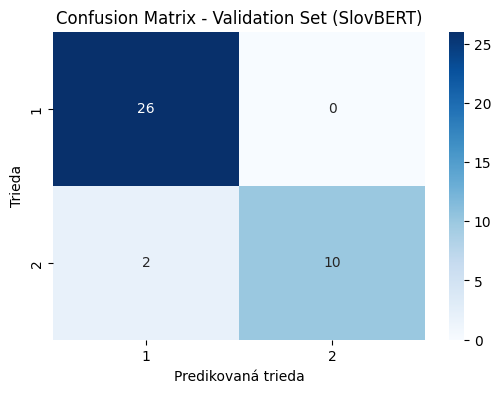

In [ ]:
# Kontrola indoxovania cielovej premennej a pripadná úprava
train_df_rozsirene['label'] = train_df_rozsirene['Rocnik'].apply(lambda x: 0 if x in [1, 2] else 1)
valid_df_rozsirene['label'] = valid_df_rozsirene['Rocnik'].apply(lambda x: 0 if x in [1, 2] else 1)
test_df_rozsirene['label']  = test_df_rozsirene['Rocnik'].apply(lambda x: 0 if x in [1, 2] else 1)

# Cesta k uloženému slovakBERTU
model_path = "./slovakbert"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=2)

# Vytvorenie Hugging Face Datasetov
train_dataset = Dataset.from_pandas(train_df_rozsirene[['Obsah', 'label']])
valid_dataset = Dataset.from_pandas(valid_df_rozsirene[['Obsah', 'label']])
test_dataset  = Dataset.from_pandas(test_df_rozsirene[['Obsah', 'label']])

# Tokenizácia
def tokenize_function(example):
    return tokenizer(example["Obsah"], padding="max_length", truncation=True, max_length=300)

train_dataset = train_dataset.map(tokenize_function, batched=True)
valid_dataset = valid_dataset.map(tokenize_function, batched=True)
test_dataset  = test_dataset.map(tokenize_function, batched=True)

# Nastavenie formátu na tensory pre PyTorch.
train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])
valid_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

# Nastavenie modelu
training_args = TrainingArguments(
    output_dir="./sloBERT_results",
    run_name="slovakbert_classification_experiment",
    num_train_epochs=10,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    seed=42,
    report_to=[]
)

# Funkcia na výpočet evaluačných metrík
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    f1_macro = f1_score(labels, predictions, average="macro")
    return {"accuracy": acc, "f1_macro": f1_macro}

# Trenovanie modelu s využitim earlystoppingu na zabranenie pretrenovaniu
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)


trainer.train()

# Vyhodnotenie modelu na validačnom sete
predictions = trainer.predict(valid_dataset)
logits = predictions.predictions
labels = predictions.label_ids
preds = np.argmax(logits, axis=-1)
acc_CS6 = accuracy_score(labels, preds)
f1_CS6 = f1_score(labels, preds, average='macro')
print("Validation Set Accuracy:", acc_CS6)
print("Validation Set F1 Score:", f1_CS6)

# Confiuson matrix validačného setu
cm_valid = confusion_matrix(labels, preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_valid, annot=True, fmt='d', cmap='Blues',
            xticklabels=[1, 2],
            yticklabels=[1, 2])
plt.xlabel("Predikovaná trieda")
plt.ylabel("Trieda")
plt.title("Confusion Matrix - Validation Set (SlovBERT)")
plt.show()